# Risk Analytics On Bank & Financial Services Case Study

This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

# Application Data

## Importing Necessary Libraries


In [1]:
import numpy as np , pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
#setting option for displaying max rows & columns
pd.set_option('display.max_columns',1000)
pd.set_option('display.max_rows',1000)

## Data Interpretation


In [3]:
# reading the given csv file
cea_df=pd.read_csv("Application_data.csv")
cea_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
cea_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
cea_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

### Data cleaning

In [6]:
#finding the percentage of the missing values
cea_df.isnull().sum()/len(cea_df)*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [7]:
#Converting into data frame and dropping the null values that are greater than 40%

samp=(100*cea_df.isnull().sum()/cea_df.shape[0]).reset_index().rename(columns={"index":"Column",0:"%missing"})
remove_cols=list(samp[samp["%missing"]>=40]["Column"])
cea_df=cea_df.drop(remove_cols,axis=1)

In [8]:
(round(100*(cea_df.isnull().sum()/len(cea_df)),3))

SK_ID_CURR                      0.000
TARGET                          0.000
NAME_CONTRACT_TYPE              0.000
CODE_GENDER                     0.000
FLAG_OWN_CAR                    0.000
FLAG_OWN_REALTY                 0.000
CNT_CHILDREN                    0.000
AMT_INCOME_TOTAL                0.000
AMT_CREDIT                      0.000
AMT_ANNUITY                     0.004
AMT_GOODS_PRICE                 0.090
NAME_TYPE_SUITE                 0.420
NAME_INCOME_TYPE                0.000
NAME_EDUCATION_TYPE             0.000
NAME_FAMILY_STATUS              0.000
NAME_HOUSING_TYPE               0.000
REGION_POPULATION_RELATIVE      0.000
DAYS_BIRTH                      0.000
DAYS_EMPLOYED                   0.000
DAYS_REGISTRATION               0.000
DAYS_ID_PUBLISH                 0.000
FLAG_MOBIL                      0.000
FLAG_EMP_PHONE                  0.000
FLAG_WORK_PHONE                 0.000
FLAG_CONT_MOBILE                0.000
FLAG_PHONE                      0.000
FLAG_EMAIL  

#### Removing columns that I think are not needed in further analysis

In [9]:
uw=['DAYS_REGISTRATION','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','NAME_TYPE_SUITE','EXT_SOURCE_2','EXT_SOURCE_3','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_YEAR','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21' ]

cea_df.drop(labels=uw,axis=1,inplace=True)
cea_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'ORGANIZATION_TYPE', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_QRT'],
      dtype='object')

## Fixing Rows and Columns

In [10]:
# changing DAYS_BIRTH column into AGE (in yrs) column
cea_df['AGE'] = abs(cea_df['DAYS_BIRTH']//365)

In [11]:
# dropping DAYS_BIRTH column
cea_df = cea_df.drop(['DAYS_BIRTH'],axis=1)

In [12]:
# changing DAYS_EMPLOYED column into YEARS_EMPLOYED column
cea_df['YEARS_EMPLOYED'] = abs(cea_df['DAYS_EMPLOYED']//365)

In [13]:
# dropping DAYS_EMPLOYED column
cea_df = cea_df.drop(['DAYS_EMPLOYED'],axis=1)

## Handling Missing Values

In [14]:
# checking the % of null values with 2 decimal places for better understanding of the data
(round(100*(cea_df.isnull().sum()/len(cea_df.index)),3))


SK_ID_CURR                      0.000
TARGET                          0.000
NAME_CONTRACT_TYPE              0.000
CODE_GENDER                     0.000
FLAG_OWN_CAR                    0.000
FLAG_OWN_REALTY                 0.000
CNT_CHILDREN                    0.000
AMT_INCOME_TOTAL                0.000
AMT_CREDIT                      0.000
AMT_ANNUITY                     0.004
AMT_GOODS_PRICE                 0.090
NAME_INCOME_TYPE                0.000
NAME_EDUCATION_TYPE             0.000
NAME_FAMILY_STATUS              0.000
NAME_HOUSING_TYPE               0.000
REGION_POPULATION_RELATIVE      0.000
DAYS_ID_PUBLISH                 0.000
OCCUPATION_TYPE                31.346
CNT_FAM_MEMBERS                 0.001
REGION_RATING_CLIENT            0.000
REGION_RATING_CLIENT_W_CITY     0.000
REG_REGION_NOT_LIVE_REGION      0.000
REG_REGION_NOT_WORK_REGION      0.000
ORGANIZATION_TYPE               0.000
DAYS_LAST_PHONE_CHANGE          0.000
AMT_REQ_CREDIT_BUREAU_QRT      13.502
AGE         

#### 1. AMT_GOODS_PRICE

In [15]:
# checking the null values 
cea_df['AMT_GOODS_PRICE'].isnull().sum()

278

In [16]:
# describing AMT_GOODS_PRICE column
cea_df['AMT_GOODS_PRICE'].describe().apply(lambda x: '%.2f' % x)

count     307233.00
mean      538396.21
std       369446.46
min        40500.00
25%       238500.00
50%       450000.00
75%       679500.00
max      4050000.00
Name: AMT_GOODS_PRICE, dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

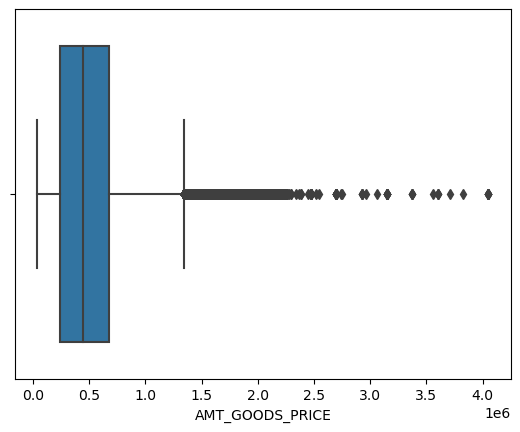

In [17]:
# checking the outliers  with the help of boxplot if any
sns.boxplot(cea_df.AMT_GOODS_PRICE)
plt.show

</p><b>As the standard deviation of AMT_GOODS_PRICE is very high. Also there are quiet a good amount of outliers present as well. So, imputing missing values with mean or median will be baised . Hence, it is better to remove the rows with missing AMT_GOODS_PRICE as there are only 278 records which will not affect any major changes.
</P></b>

In [18]:
cea_df= cea_df[~np.isnan(cea_df['AMT_GOODS_PRICE'])]

#### 2. OCCUPATION_TYPE

In [19]:
cea_df['OCCUPATION_TYPE'].value_counts(dropna=False)

NaN                      96334
Laborers                 55134
Sales staff              32064
Core staff               27531
Managers                 21348
Drivers                  18590
High skill tech staff    11371
Accountants               9802
Medicine staff            8528
Security staff            6713
Cooking staff             5940
Cleaning staff            4648
Private service staff     2648
Low-skill Laborers        2092
Waiters/barmen staff      1346
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   525
Name: OCCUPATION_TYPE, dtype: int64

<b>I believe the likelihood of nan values in the OCCUPATION_TYPE column is that the applicant has not filled out the field because it is not a required one on the application. I believe it will be best to avoid handling nan values because doing so would interfere with my research. </b>

#### 3. AMT_REQ_CREDIT_BUREAU_QRT

In [20]:
# describing the column
cea_df['AMT_REQ_CREDIT_BUREAU_QRT'].describe()

count    265760.000000
mean          0.265525
std           0.794239
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

<b>It will not be a good idea to input this column's values using the mean and median values. As a result, we must impute them using mode.
</b>

In [21]:
# displaying frequencies of each category
cea_df['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts()

0.0      215219
1.0       33841
2.0       14400
3.0        1716
4.0         476
5.0          64
6.0          28
8.0           7
7.0           7
261.0         1
19.0          1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

<b>Let's infer the NaNs using the most typical number of AMT_REQ_CREDIT_BUREAU_QRT, which is 0.</b>

In [22]:
# Imputing the column with mode value
cea_df.loc[pd.isnull(cea_df['AMT_REQ_CREDIT_BUREAU_QRT']), ['AMT_REQ_CREDIT_BUREAU_QRT']] = 0

In [23]:
# Checking the columns after handling missing values
(round(100*(cea_df.isnull().sum()/len(cea_df.index)),2))

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.00
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_ID_PUBLISH                 0.00
OCCUPATION_TYPE                31.36
CNT_FAM_MEMBERS                 0.00
REGION_RATING_CLIENT            0.00
REGION_RATING_CLIENT_W_CITY     0.00
REG_REGION_NOT_LIVE_REGION      0.00
REG_REGION_NOT_WORK_REGION      0.00
ORGANIZATION_TYPE               0.00
DAYS_LAST_PHONE_CHANGE          0.00
AMT_REQ_CREDIT_BUREAU_QRT       0.00
AGE                             0.00
Y

In [24]:
# Describing the Gender column to check the number of females and males
cea_df['CODE_GENDER'].value_counts()

F      202259
M      104970
XNA         4
Name: CODE_GENDER, dtype: int64

In [25]:
# Deleting rows where CODE_GENDER == XNA
# There are four such rows
cea_df= cea_df[~(cea_df['CODE_GENDER'] == 'XNA')]

## Handling Outliers

In [26]:
# Using 1.5 IQR method in all numerical columns using 1.5 IQR method for detecting the outliers and deleting them
col_list_outlier = ['AGE','AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY']
for col in col_list_outlier: 
    q1 = cea_df[col].quantile(0.25)
    q3 = cea_df[col].quantile(0.75)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    cea_df = cea_df.loc[(cea_df[col] > range_low) & (cea_df[col] < range_high)]

cea_df.shape

(274448, 28)

In [27]:
# Percentage of rows lost
round((100 - 100*(len(cea_df.index)/307511)),2)

10.75

<b>I lost 10.18 % of rows while handling outliers , Now I can get the fair analysis of the data</b>

## Data Imbalance

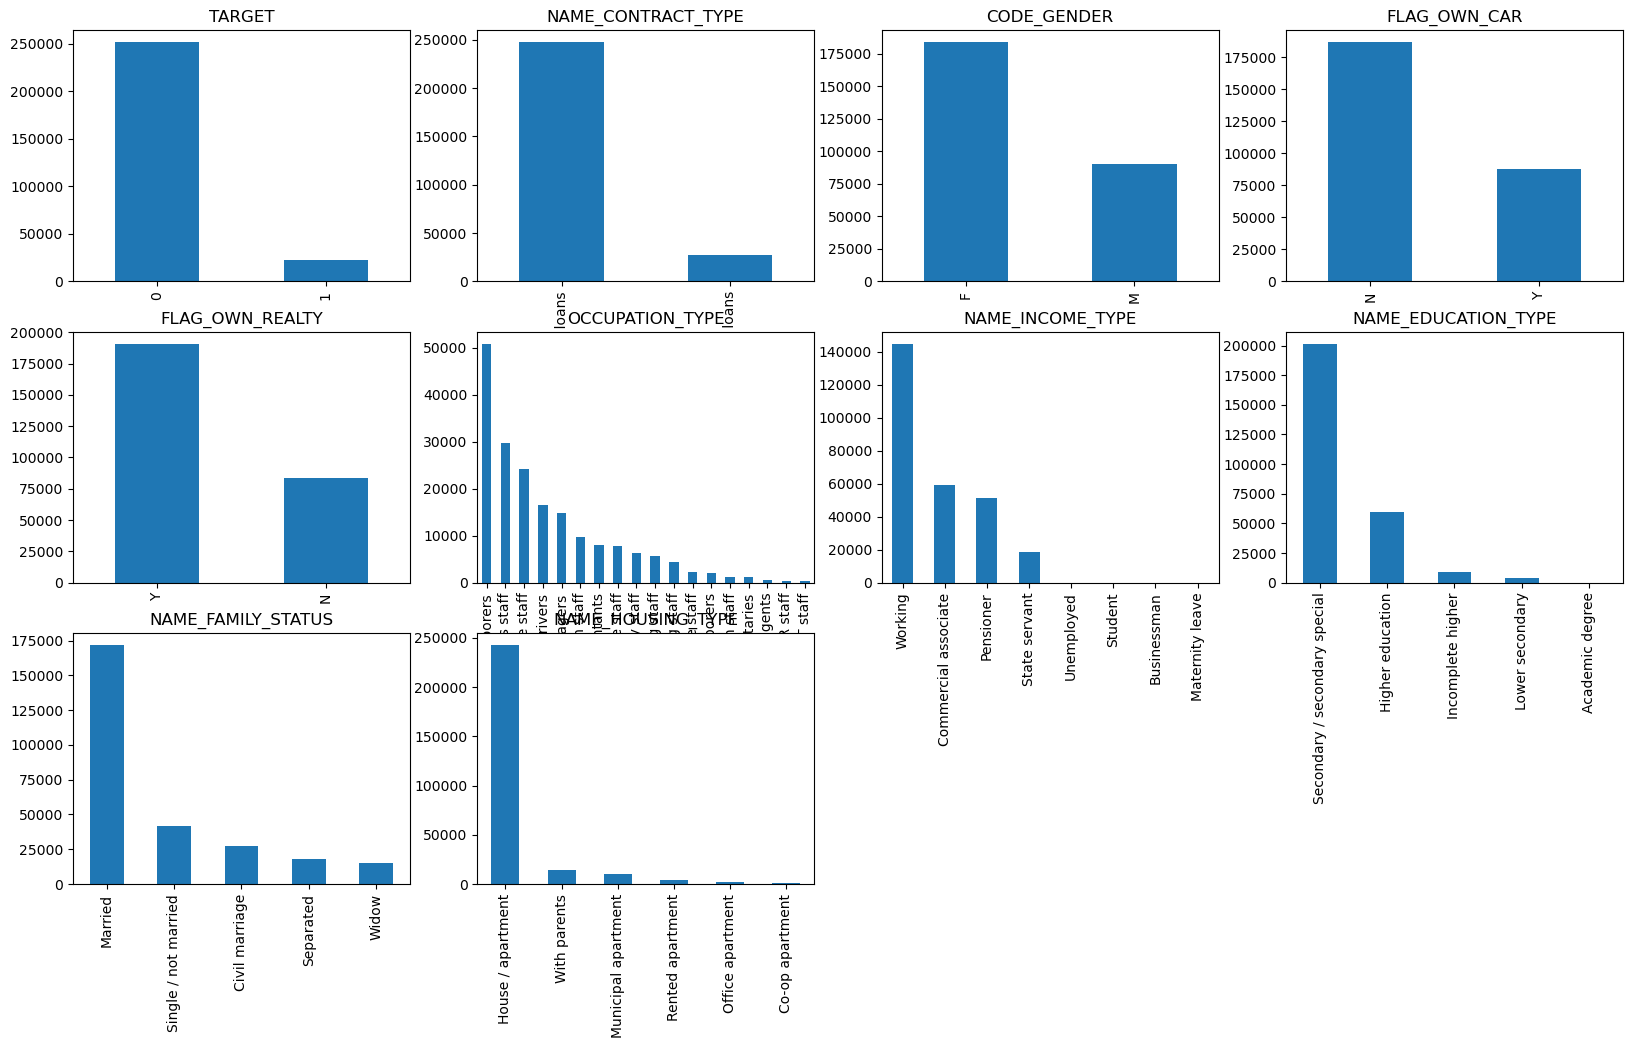

In [28]:
# Listing columns for checking data imbalance and plotting them by using for loop
col_list = ['TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','OCCUPATION_TYPE','NAME_INCOME_TYPE',
            'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']
b=0
plt.figure(figsize=(20,15))
for col in col_list:    
    b=b+1
    plt.subplot(4, 4,b)    
    cea_df[col].value_counts().plot(kind='bar');
    plt.title(col)

We can see that there is data imbalance in below columns:-

1. TARGET - There are only a few defaulters(1) compare to Repayers(0)
2. NAME_CONTRACT_TYPE - There are only a few Revolving loans than Cash loans
3. NAME_EDUCATION_TYPE - Majority of loans applied for by individuals with secondary or higher special education.
4. NAME_FAMILY_STATUS - Majority of loans applied for by married individuals.
5. NAME_HOUSING_TYPE - Majority of loans applied for by homeowners and apartment owners.

In [29]:
# checking ratio of Target 0 to Target 1
round(cea_df[cea_df.TARGET==0].shape[0]/cea_df[cea_df.TARGET==1].shape[0])

11

<b>1 in every 11 applicant has payment difficulty. Data Imbalance Ratio = 11</b>

## Binning

### AGE


<b>Creating Young, Mid-Aged, and Senior Citizen age categories for improved comprehension while analyzing</b>

In [30]:
# checking the mean value
cea_df['AGE'].describe()

count    274448.000000
mean         44.434068
std          12.127155
min          21.000000
25%          34.000000
50%          44.000000
75%          55.000000
max          70.000000
Name: AGE, dtype: float64

In [31]:
# Define function for categorizing AGE_GROUP 
def age_group(x):
    if (x < 40):
        return 'Young'
    elif (x >= 40 and x < 60):
        return 'Mid Age'
    else:
        return 'Senior Citizens'

In [32]:
#Creating new column AGE_GROUP
cea_df['AGE_GROUP'] = cea_df['AGE'].apply(age_group)
cea_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_QRT,AGE,YEARS_EMPLOYED,AGE_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-2120,Laborers,1.0,2,2,0,0,Business Entity Type 3,-1134.0,0.0,26,2,Young
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-291,Core staff,2.0,1,1,0,0,School,-828.0,0.0,46,4,Mid Age
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-2531,Laborers,1.0,2,2,0,0,Government,-815.0,0.0,53,1,Mid Age
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-2437,Laborers,2.0,2,2,0,0,Business Entity Type 3,-617.0,0.0,53,9,Mid Age
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-3458,Core staff,1.0,2,2,0,0,Religion,-1106.0,0.0,55,9,Mid Age


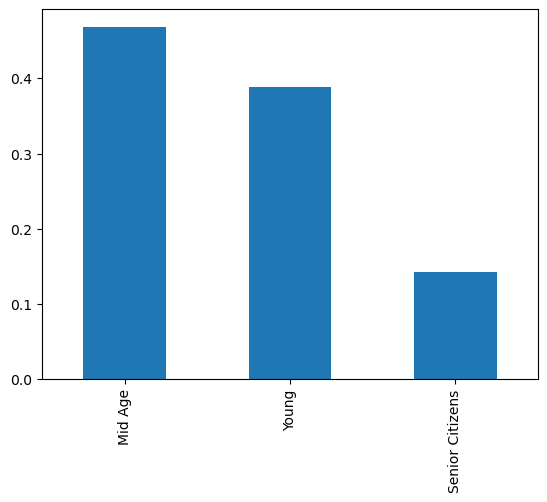

In [33]:
cea_df['AGE_GROUP'].value_counts(normalize=True).plot.bar()
plt.show()

<b>Findings- </b>Mid Age group are the largest age group to apply for a loan.


### AMT_CREDIT

<b>Creating three credit amount groups - High, medium and low</b>

In [34]:
# checking mean value
round(cea_df['AMT_CREDIT'].describe(),2)

count     274448.00
mean      526116.81
std       314436.47
min        45000.00
25%       269550.00
50%       468733.50
75%       738171.00
max      1482831.00
Name: AMT_CREDIT, dtype: float64

In [35]:
# Define function for categorizing CREDIT_GROUP
def credit_group(x):
    if (x < 500000):
        return 'Low (Below 500000)'
    elif (x >= 500000 and x < 750000):
        return 'Medium (b/w 500000 & 750000)'
    else:
        return 'High (Above 750000)'

In [36]:
#Creating new column CREDIT_GROUP
cea_df['CREDIT_GROUP'] = cea_df['AMT_CREDIT'].apply(credit_group)
cea_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_QRT,AGE,YEARS_EMPLOYED,AGE_GROUP,CREDIT_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-2120,Laborers,1.0,2,2,0,0,Business Entity Type 3,-1134.0,0.0,26,2,Young,Low (Below 500000)
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-291,Core staff,2.0,1,1,0,0,School,-828.0,0.0,46,4,Mid Age,High (Above 750000)
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-2531,Laborers,1.0,2,2,0,0,Government,-815.0,0.0,53,1,Mid Age,Low (Below 500000)
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-2437,Laborers,2.0,2,2,0,0,Business Entity Type 3,-617.0,0.0,53,9,Mid Age,Low (Below 500000)
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-3458,Core staff,1.0,2,2,0,0,Religion,-1106.0,0.0,55,9,Mid Age,Medium (b/w 500000 & 750000)


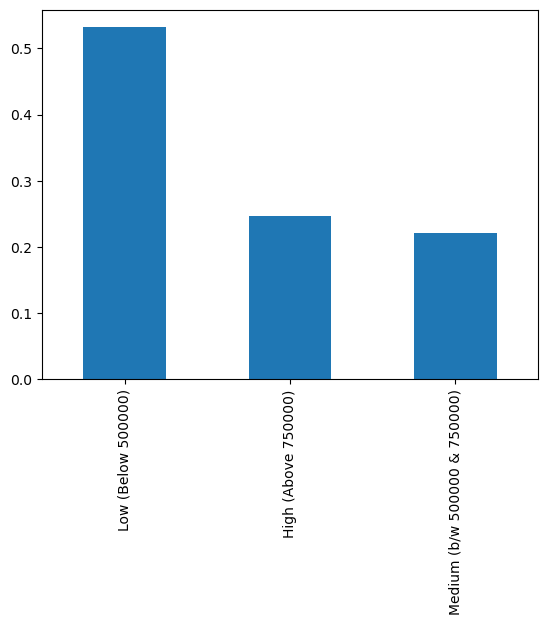

In [37]:
cea_df['CREDIT_GROUP'].value_counts(normalize=True).plot.bar()
plt.show()

<b>Findings- </b>The low credit group is the most creditworthy group for the amount of the loan

### AMT_INCOME_TOTAL

<b>Creating three income groups - High, medium and Low</b>

In [38]:
#checking the mean value
cea_df['AMT_INCOME_TOTAL'].describe()

count    274448.000000
mean     149482.769782
std       60865.655378
min       25650.000000
25%      108000.000000
50%      135000.000000
75%      180000.000000
max      337050.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [39]:
# Define function for categorize AMT_INCOME_TOTAL
def income_group(x):
    if (x < 100000):
        return 'Low (Below 100000)'
    elif(x >= 100000 and x < 150000):
        return 'Medium (b/w 100000 & 150000)'
    else:
        return 'High (Above 150000)'

In [40]:
# Creating column INCOME_GROUP 
cea_df['INCOME_GROUP'] =cea_df['AMT_INCOME_TOTAL'].apply(income_group)
cea_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_QRT,AGE,YEARS_EMPLOYED,AGE_GROUP,CREDIT_GROUP,INCOME_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-2120,Laborers,1.0,2,2,0,0,Business Entity Type 3,-1134.0,0.0,26,2,Young,Low (Below 500000),High (Above 150000)
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-291,Core staff,2.0,1,1,0,0,School,-828.0,0.0,46,4,Mid Age,High (Above 750000),High (Above 150000)
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-2531,Laborers,1.0,2,2,0,0,Government,-815.0,0.0,53,1,Mid Age,Low (Below 500000),Low (Below 100000)
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-2437,Laborers,2.0,2,2,0,0,Business Entity Type 3,-617.0,0.0,53,9,Mid Age,Low (Below 500000),Medium (b/w 100000 & 150000)
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-3458,Core staff,1.0,2,2,0,0,Religion,-1106.0,0.0,55,9,Mid Age,Medium (b/w 500000 & 750000),Medium (b/w 100000 & 150000)


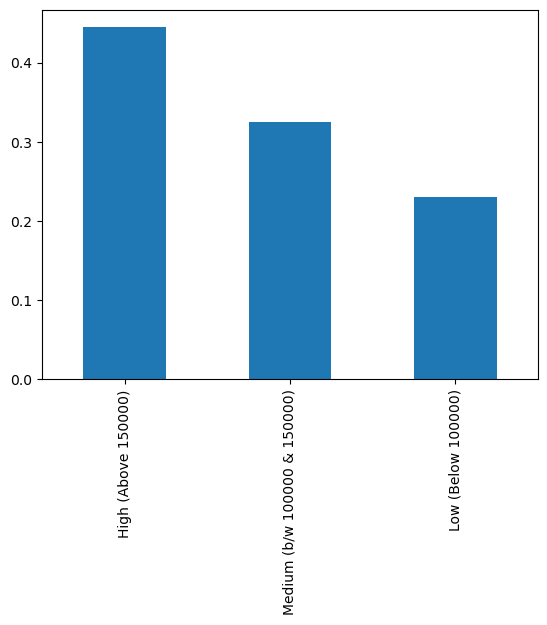

In [41]:
cea_df['INCOME_GROUP'].value_counts(normalize=True).plot.bar()
plt.show()

<b>Findings- </b>High Income group is the largest Group applying for loans.

## Dividing dataframe into Target 0 and Target 1

Target_1(Defaulters) - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample <br>
Target_0(Repayers) - all other cases, ie no payment difficulties

In [42]:
df_target_0=cea_df[cea_df['TARGET']==0]
df_target_0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_QRT,AGE,YEARS_EMPLOYED,AGE_GROUP,CREDIT_GROUP,INCOME_GROUP
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-291,Core staff,2.0,1,1,0,0,School,-828.0,0.0,46,4,Mid Age,High (Above 750000),High (Above 150000)
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-2531,Laborers,1.0,2,2,0,0,Government,-815.0,0.0,53,1,Mid Age,Low (Below 500000),Low (Below 100000)
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-2437,Laborers,2.0,2,2,0,0,Business Entity Type 3,-617.0,0.0,53,9,Mid Age,Low (Below 500000),Medium (b/w 100000 & 150000)
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-3458,Core staff,1.0,2,2,0,0,Religion,-1106.0,0.0,55,9,Mid Age,Medium (b/w 500000 & 750000),Medium (b/w 100000 & 150000)
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,State servant,Secondary / secondary special,Married,House / apartment,0.035792,-477,Laborers,2.0,2,2,0,0,Other,-2536.0,1.0,47,5,Mid Age,Low (Below 500000),Low (Below 100000)


In [43]:
df_target_1=cea_df[cea_df['TARGET']==1]
df_target_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_QRT,AGE,YEARS_EMPLOYED,AGE_GROUP,CREDIT_GROUP,INCOME_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-2120,Laborers,1.0,2,2,0,0,Business Entity Type 3,-1134.0,0.0,26,2,Young,Low (Below 500000),High (Above 150000)
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Working,Secondary / secondary special,Widow,House / apartment,0.018029,-1827,Cooking staff,1.0,3,2,0,0,Business Entity Type 3,-161.0,2.0,52,8,Mid Age,High (Above 750000),Medium (b/w 100000 & 150000)
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,-1029,Laborers,2.0,2,2,0,0,Business Entity Type 3,-1075.0,0.0,48,4,Mid Age,High (Above 750000),High (Above 150000)
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,-4409,Sales staff,2.0,3,3,0,0,Self-employed,-1480.0,0.0,37,10,Young,Low (Below 500000),Medium (b/w 100000 & 150000)
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,252000.0,Pensioner,Secondary / secondary special,Married,House / apartment,0.028663,-4199,NaN,2.0,2,2,0,0,XNA,0.0,0.0,68,1000,Senior Citizens,Low (Below 500000),Low (Below 100000)


## Univariate Analysis

### 1. Categorical Variables

#### Gender

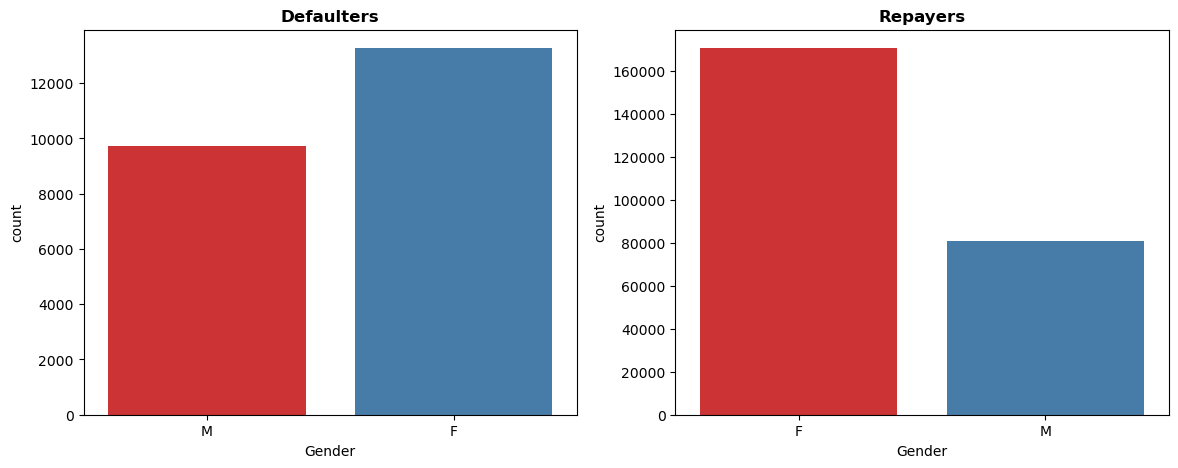

In [44]:
# Plotting 2 graphs on basis of CODE_GENDER

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)    
df = sns.countplot(x = 'CODE_GENDER',data=df_target_1,palette = "Set1")
plt.title('Defaulters', fontweight="bold")
df.set(xlabel='Gender');

plt.subplot(1,2,2) 
df = sns.countplot(x ='CODE_GENDER',data=df_target_0,palette = "Set1")
plt.title('Repayers', fontweight="bold")
df.set(xlabel='Gender');

#### Income Type

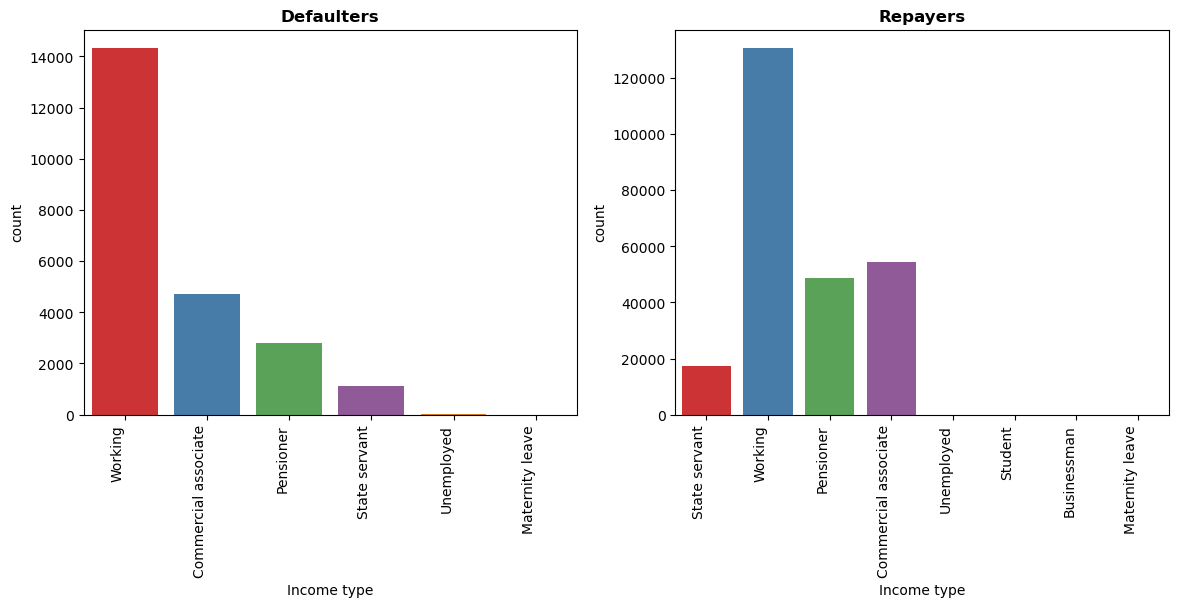

In [45]:
#plotting 2 graphs on the basis of NAME_INCOME_TYPE
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
df = sns.countplot(x = 'NAME_INCOME_TYPE',data=df_target_1,palette = "Set1")
plt.title('Defaulters', fontweight="bold")
df.set(xlabel='Income type')
temp = df.set_xticklabels(df.get_xticklabels(), rotation = 90, horizontalalignment='right')


plt.subplot(1,2,2) 
df = sns.countplot(x = 'NAME_INCOME_TYPE',data=df_target_0,palette = "Set1")
plt.title('Repayers',fontweight="bold")
df.set(xlabel='Income type')
temp =df.set_xticklabels(df.get_xticklabels(), rotation = 90, horizontalalignment='right')

#### Loan Type

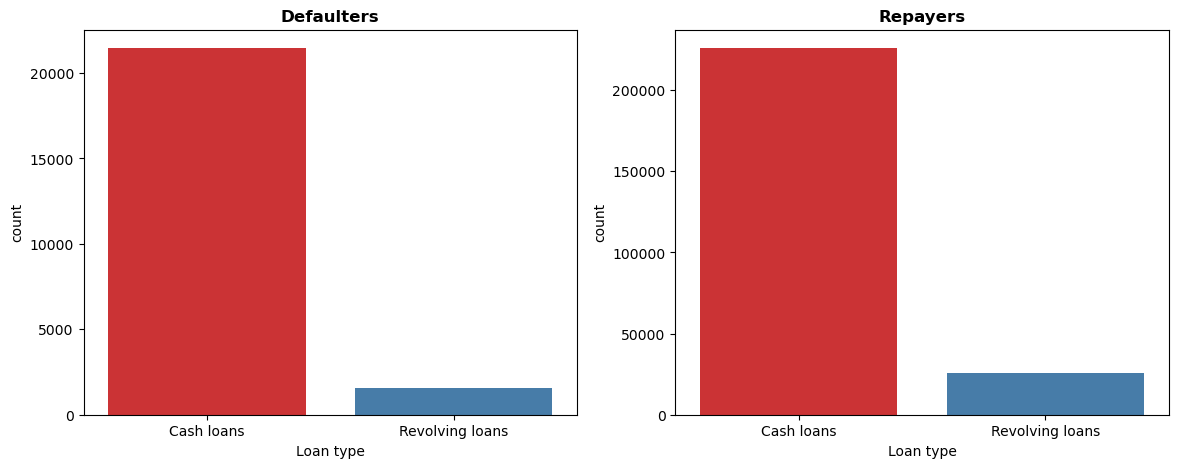

In [46]:
# plotting graphs on the basis of NAME_CONTRACT_TYPE
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
df= sns.countplot(x = 'NAME_CONTRACT_TYPE',data=df_target_1,palette = "Set1")
plt.title('Defaulters', fontweight="bold")
df.set(xlabel='Loan type')

plt.subplot(1,2,2) 
df= sns.countplot(x = 'NAME_CONTRACT_TYPE',data=df_target_0,palette = "Set1")
plt.title('Repayers', fontweight="bold")
df.set(xlabel='Loan type');

#### Occupation

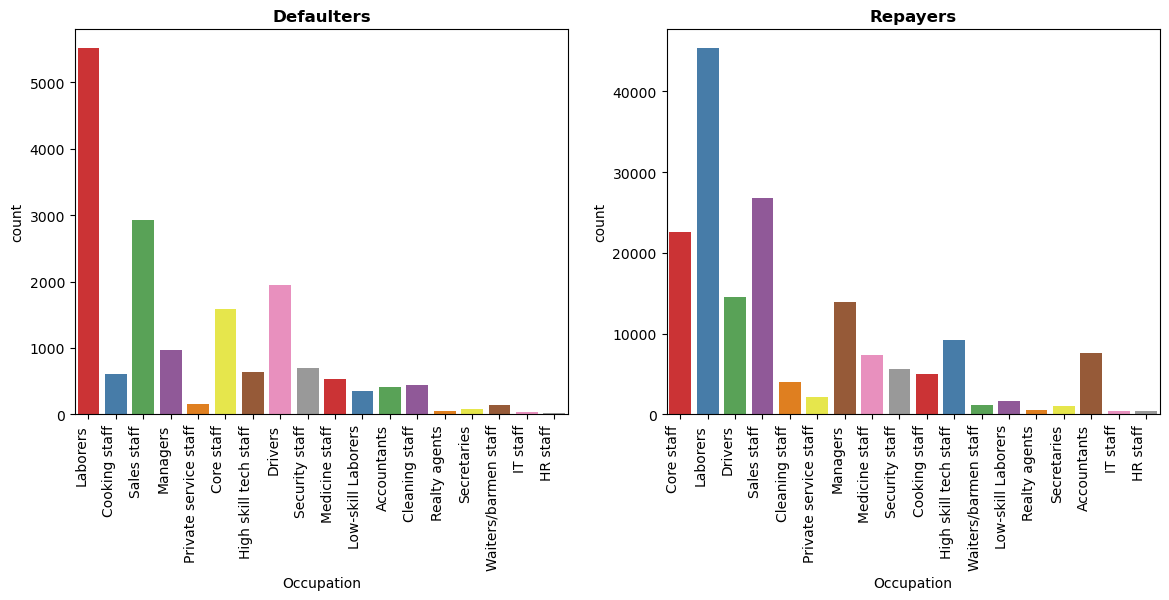

In [47]:
# plotting graphs on the basis of OCCUPATION_TYPE
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
df = sns.countplot(x = 'OCCUPATION_TYPE',data=df_target_1,palette = "Set1")
plt.title('Defaulters', fontweight="bold")
df.set(xlabel='Occupation')
temp =df.set_xticklabels(df.get_xticklabels(), rotation = 90, horizontalalignment='right')


plt.subplot(1,2,2) 
df = sns.countplot(x = 'OCCUPATION_TYPE',data=df_target_0,palette = "Set1")
plt.title('Repayers', fontweight="bold")
df.set(xlabel='Occupation')
temp = df.set_xticklabels(df.get_xticklabels(), rotation = 90, horizontalalignment='right');

#### Education Type

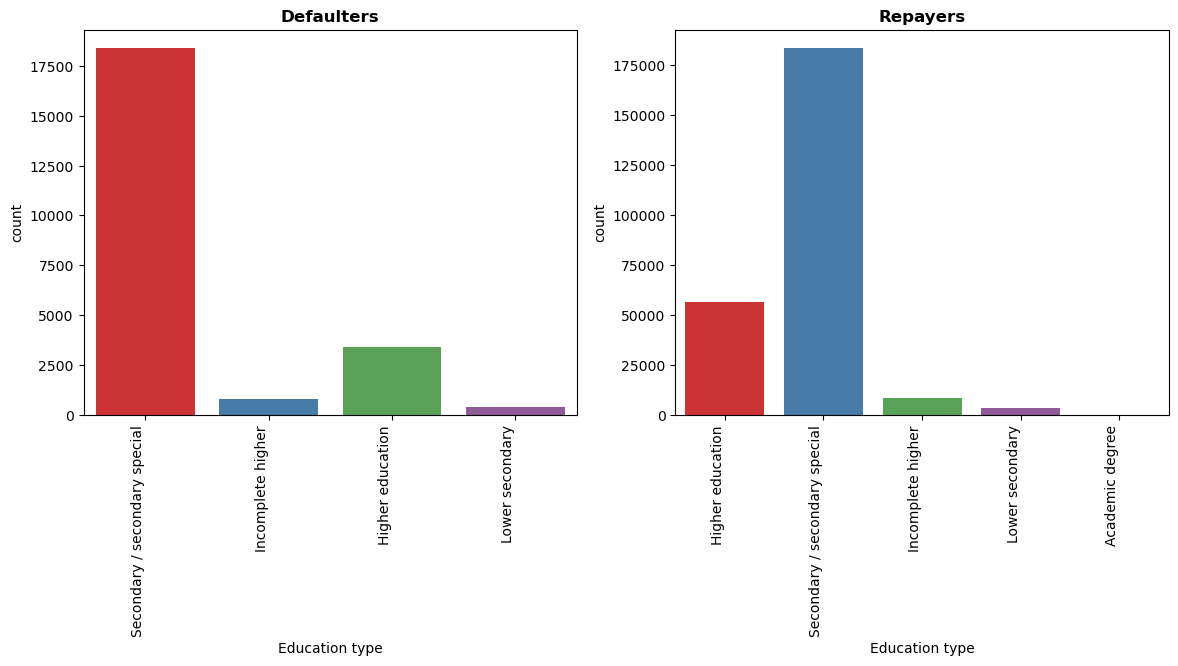

In [48]:
# plotting graphs on the basis of NAME_EDUCATION_TYPE
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
df = sns.countplot(x = 'NAME_EDUCATION_TYPE',data=df_target_1,palette = "Set1")
plt.title('Defaulters', fontweight="bold")
df.set(xlabel='Education type')
temp = df.set_xticklabels(df.get_xticklabels(), rotation = 90, horizontalalignment='right')


plt.subplot(1,2,2) 
df = sns.countplot(x = 'NAME_EDUCATION_TYPE',data=df_target_0,palette = "Set1")
plt.title('Repayers', fontweight="bold")
df.set(xlabel='Education type')
temp = df.set_xticklabels(df.get_xticklabels(), rotation = 90, horizontalalignment='right');

#### Family Status

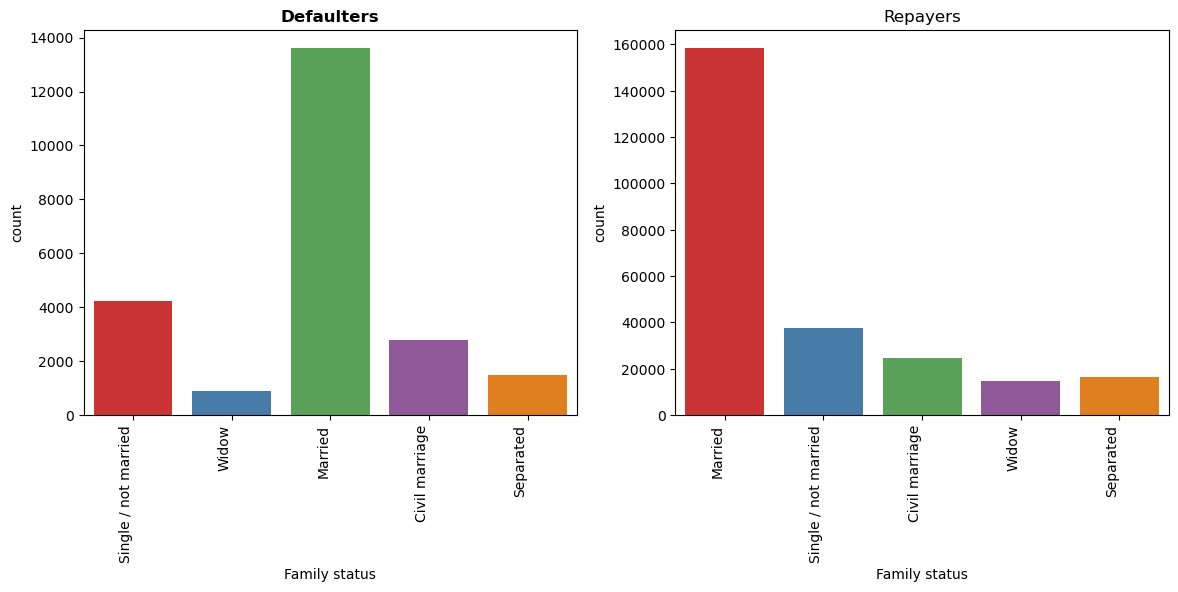

In [49]:
# plotting graphs on the basis of NAME_FAMILY_STATUS
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
df = sns.countplot(x = 'NAME_FAMILY_STATUS',data=df_target_1,palette = "Set1")
plt.title('Defaulters', fontweight="bold")
df.set(xlabel='Family status')
temp = df.set_xticklabels(df.get_xticklabels(), rotation = 90, horizontalalignment='right')


plt.subplot(1,2,2) 
df = sns.countplot(x = 'NAME_FAMILY_STATUS',data=df_target_0,palette = "Set1")
plt.title('Repayers')
df.set(xlabel='Family status')
temp = df.set_xticklabels(df.get_xticklabels(), rotation = 90, horizontalalignment='right');

### 2. Continous Variables

#### Credit Amount of Loan

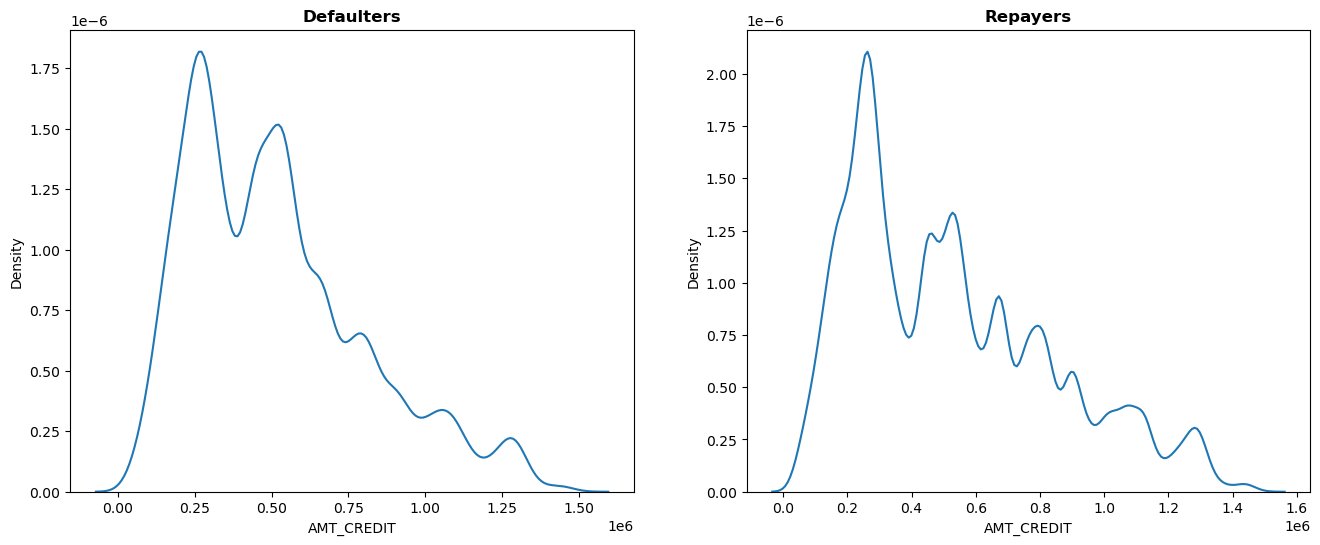

In [50]:
# plotting graphs on the basis of AMT_CREDIT
plt.figure(figsize=(16,6))
plt.subplot(1,2,1) 
plt.title('Defaulters', fontweight="bold")
sns.distplot(df_target_1['AMT_CREDIT'],hist=False)

plt.subplot(1,2,2) 
plt.title('Repayers', fontweight="bold")
sns.distplot(df_target_0['AMT_CREDIT'],hist=False);

#### Total Income

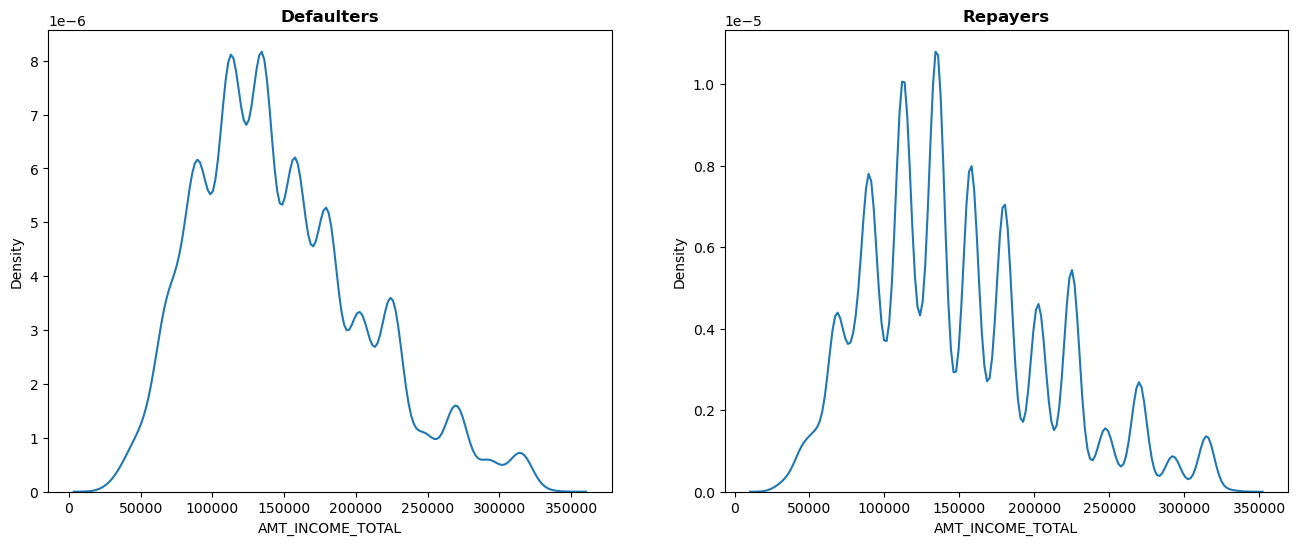

In [51]:
# plotting graphs on the basis of AMT_INCOME_TOTAL
plt.figure(figsize=(16,6))
plt.subplot(1,2,1) 
plt.title('Defaulters',fontweight='bold')
sns.distplot(df_target_1['AMT_INCOME_TOTAL'],hist=False)

plt.subplot(1,2,2) 
plt.title('Repayers',fontweight='bold')
sns.distplot(df_target_0['AMT_INCOME_TOTAL'],hist=False);

#### Loan Annuity

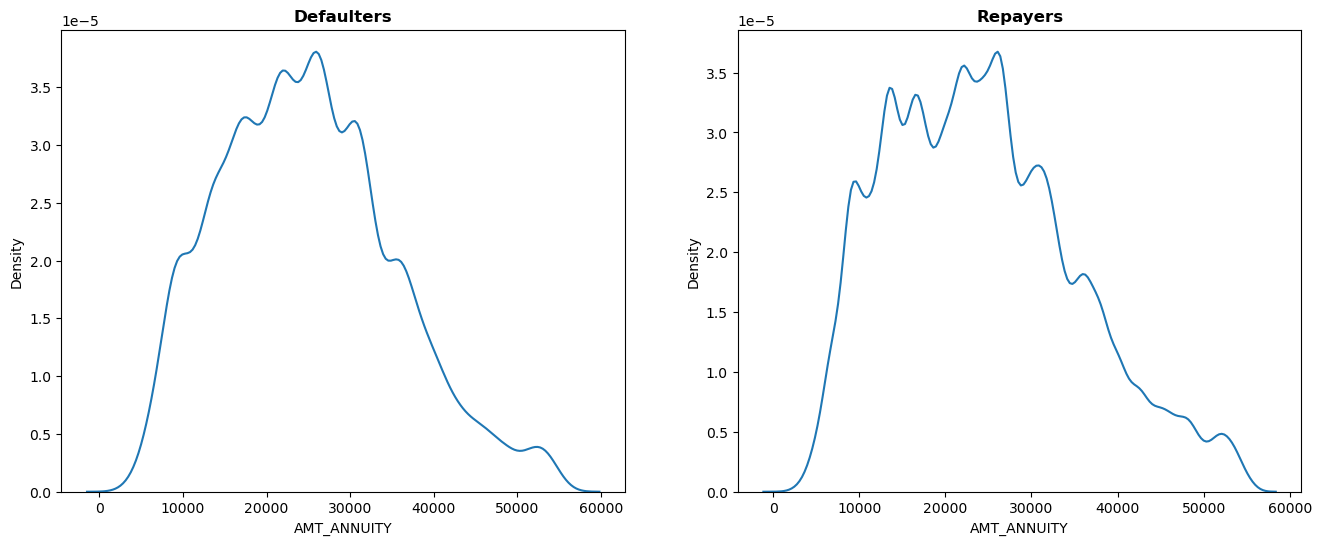

In [52]:
# plotting graphs on the basis of AMT_ANNUITY
plt.figure(figsize=(16,6))
plt.subplot(1,2,1) 
plt.title('Defaulters',fontweight='bold')
sns.distplot(df_target_1['AMT_ANNUITY'],hist=False)

plt.subplot(1,2,2) 
plt.title('Repayers',fontweight='bold')
sns.distplot(df_target_0['AMT_ANNUITY'],hist=False);

## Segmented Univariate Analysis

### 1. Categorical Variables

#### Age Group

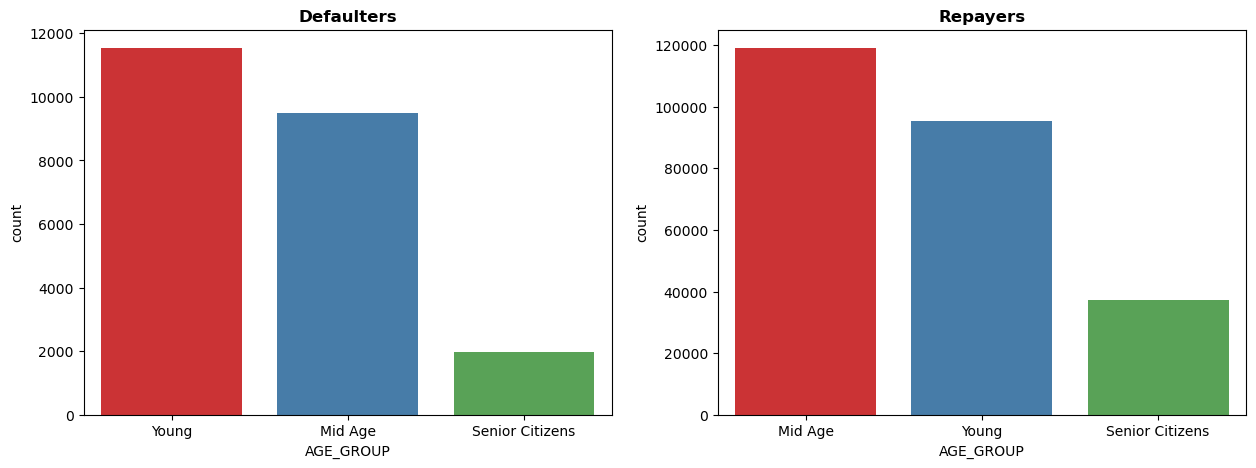

In [53]:
# Plotting graphs on the basis of AGE_GROUP
plt.figure(figsize=(15,5))

plt.subplot(1,2,1) 
sns.countplot(x='AGE_GROUP',data=df_target_1,palette = "Set1")
plt.title('Defaulters',fontweight='bold')

plt.subplot(1,2,2)
sns.countplot(x='AGE_GROUP',data=df_target_0,palette = "Set1")
plt.title('Repayers',fontweight='bold');

#### Income Group

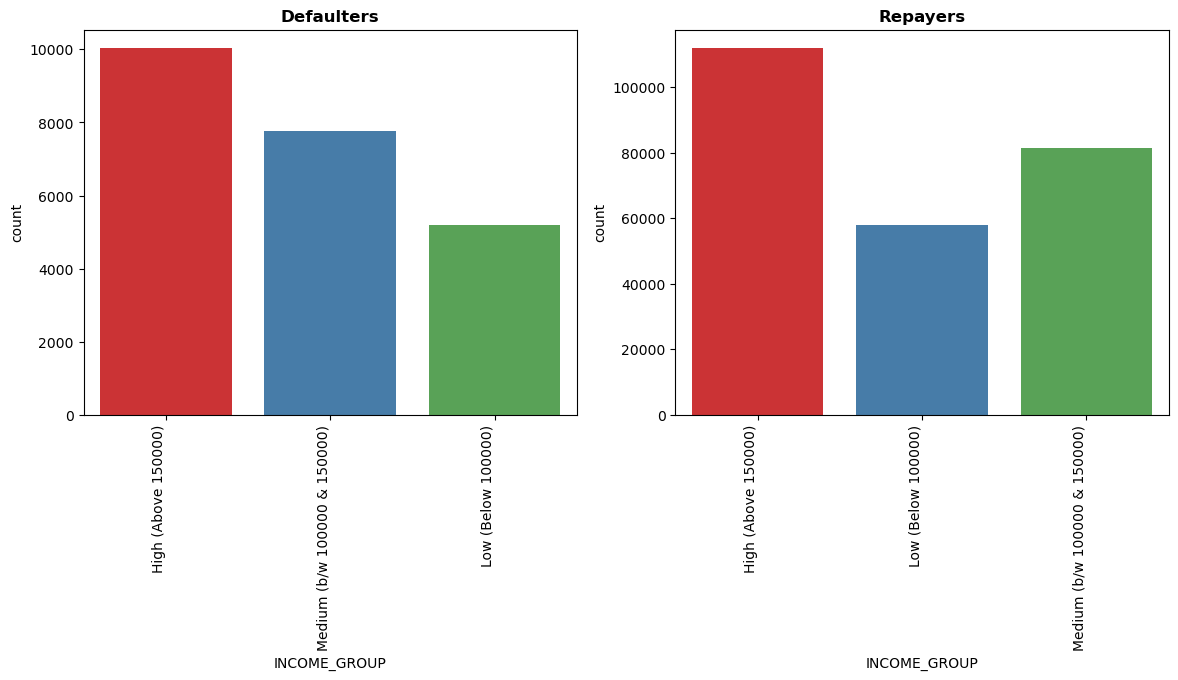

In [54]:
# Plotting graphs on the basis of INCOME_GROUP
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
df=sns.countplot(x = 'INCOME_GROUP',data=df_target_1,palette = "Set1")
plt.title('Defaulters',fontweight='bold')
temp = df.set_xticklabels(df.get_xticklabels(), rotation = 90, horizontalalignment='right')

plt.subplot(1,2,2) 
df =sns.countplot(x = 'INCOME_GROUP',data=df_target_0,palette = "Set1")
plt.title('Repayers',fontweight='bold')
temp = df.set_xticklabels(df.get_xticklabels(), rotation = 90, horizontalalignment='right');

#### Credit Group

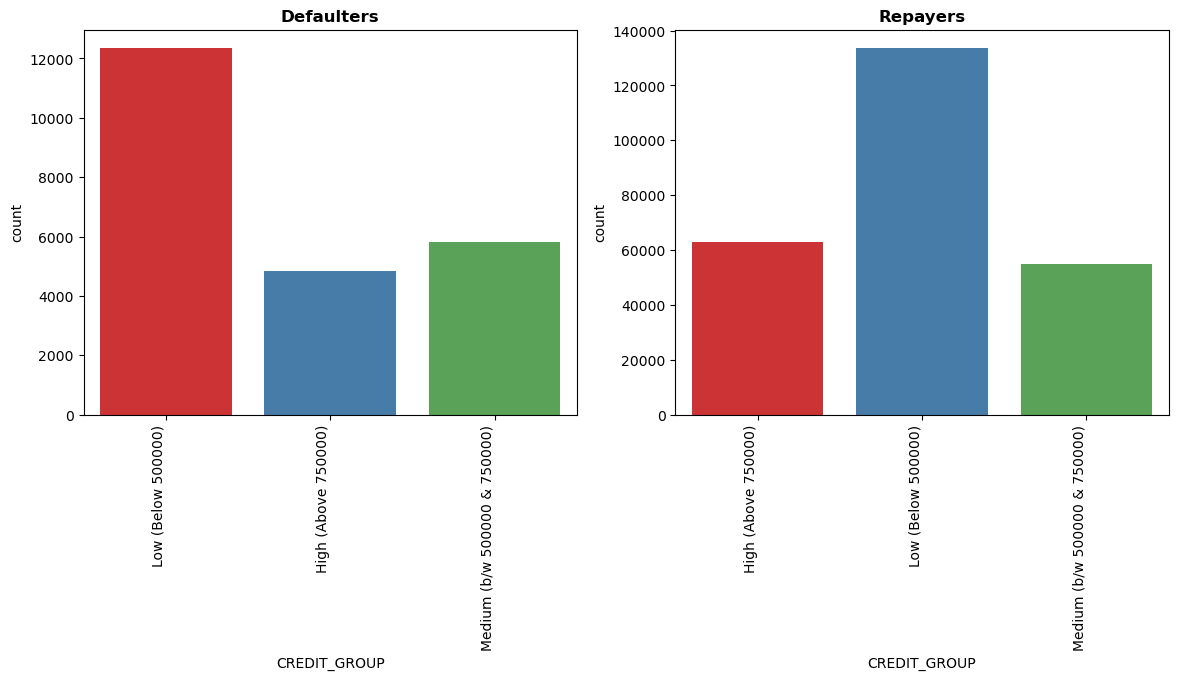

In [55]:
# Plotting graphs on the basis of CREDIT_GROUP
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
df=sns.countplot(x = 'CREDIT_GROUP',data=df_target_1,palette = "Set1")
plt.title('Defaulters',fontweight='bold')
temp = df.set_xticklabels(df.get_xticklabels(), rotation = 90, horizontalalignment='right')

plt.subplot(1,2,2) 
df=sns.countplot(x = 'CREDIT_GROUP',data=df_target_0,palette = "Set1")
plt.title('Repayers',fontweight='bold')
temp = df.set_xticklabels(df.get_xticklabels(), rotation = 90, horizontalalignment='right');

## Bivariate Analysis

### 1.Numerical Variable

In [56]:
# Listing the columns for finding correlation
corr_cols = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','AGE','REGION_RATING_CLIENT']

### Correlation for Defaulters

In [57]:
# Creating dataframe for numerical columns
df_corr_target_1 = df_target_1[corr_cols]

In [58]:
# Matrix
df_corr_target_1.corr()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,AGE,REGION_RATING_CLIENT
AMT_INCOME_TOTAL,1.000000,0.295314,0.375475,0.295976,-0.017957,-0.141015
AMT_CREDIT,0.295314,1.000000,0.741705,0.977917,0.134409,-0.036350
AMT_ANNUITY,0.375475,0.741705,1.000000,0.739797,0.001871,-0.043228
AMT_GOODS_PRICE,0.295976,0.977917,0.739797,1.000000,0.135581,-0.044883
AGE,-0.017957,0.134409,0.001871,0.135581,1.000000,-0.034762
REGION_RATING_CLIENT,-0.141015,-0.036350,-0.043228,-0.044883,-0.034762,1.000000


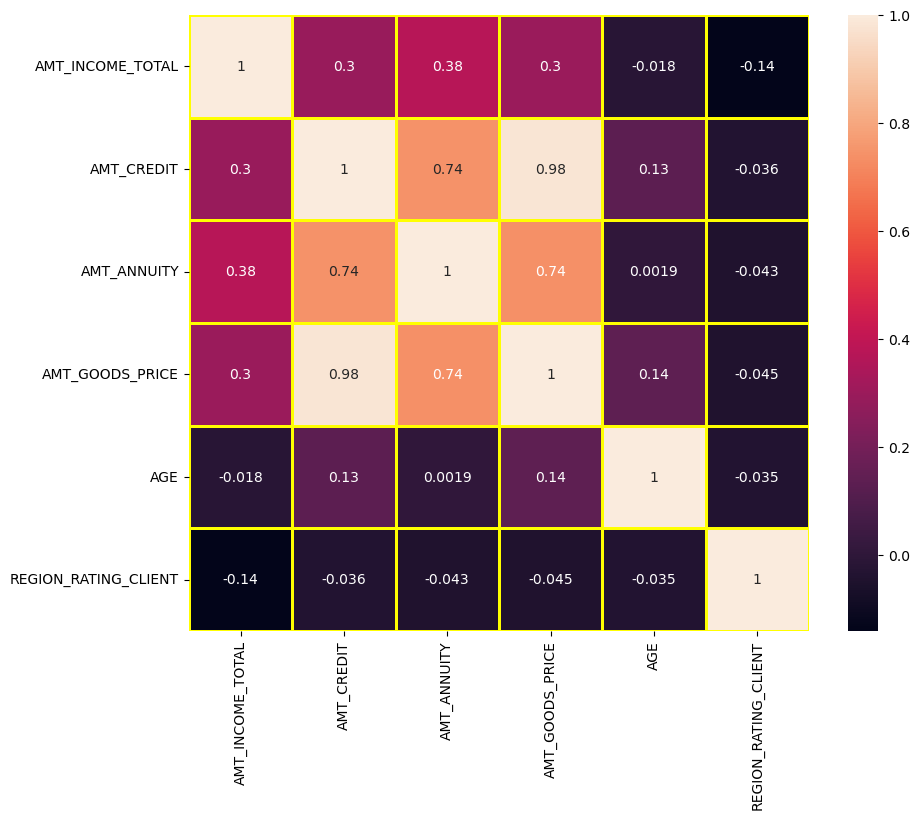

In [59]:
#plotting heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df_corr_target_1.corr(), linewidths=2,linecolor="yellow",annot=True);

<b>Highly correlated columns for defaulters</b>
1. AMT_CREDIT and AMT_ANNUITY (0.74)
2. AMT_CREDIT and AMT_GOODS_PRICE (0.98)
3. AMT_ANNUITY and AMT_GOODS_PRICE (0.74)

### Correlation for Non-Defaulters

In [60]:
# Creating dataframe for numerical columns
df_corr_target_0 = df_target_0[corr_cols]

In [61]:
# Matrix
df_corr_target_0.corr()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,AGE,REGION_RATING_CLIENT
AMT_INCOME_TOTAL,1.000000,0.320749,0.399698,0.323995,-0.100822,-0.172527
AMT_CREDIT,0.320749,1.000000,0.761134,0.981972,0.048430,-0.045117
AMT_ANNUITY,0.399698,0.761134,1.000000,0.761486,-0.022145,-0.075514
AMT_GOODS_PRICE,0.323995,0.981972,0.761486,1.000000,0.046587,-0.046996
AGE,-0.100822,0.048430,-0.022145,0.046587,1.000000,-0.004661
REGION_RATING_CLIENT,-0.172527,-0.045117,-0.075514,-0.046996,-0.004661,1.000000


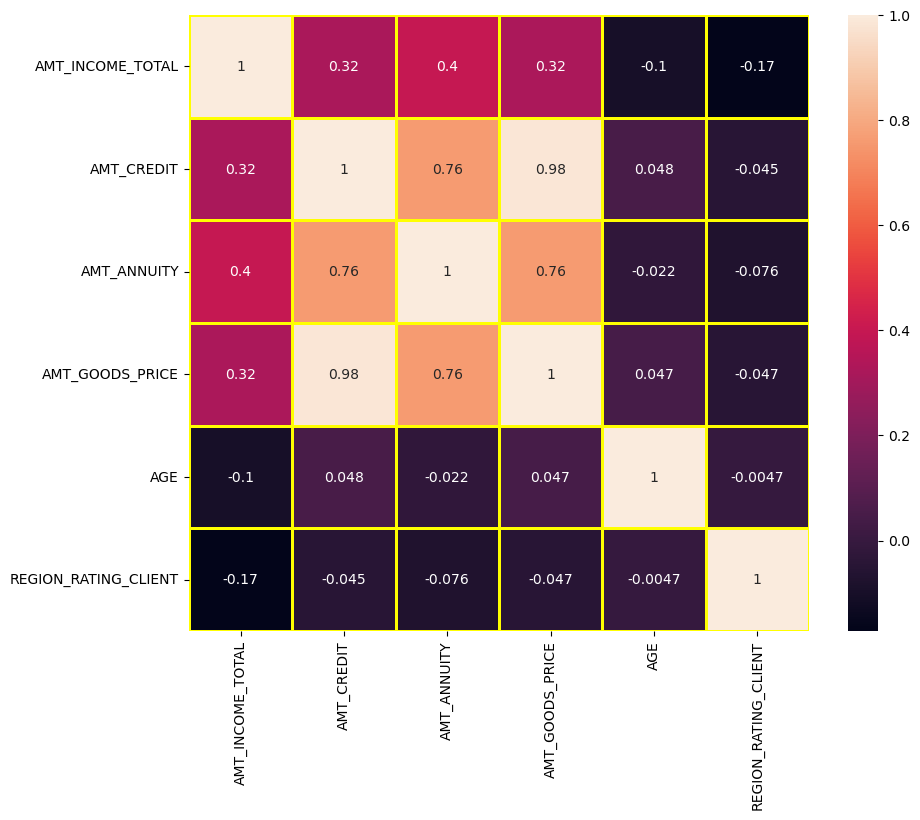

In [62]:
#plotting the heat map
plt.figure(figsize=(10,8))
sns.heatmap(df_corr_target_0.corr(), linewidths=2,linecolor="yellow",annot=True);

<b>Highly correlate columns for Repayers</b>
1. AMT_CREDIT and AMT_ANNUITY is (0.76)
2. AMT_CREDIT and AMT_GOODS_PRICE is (0.98)
3. AMT_ANNUITY and AMT_GOODS_PRICE is (0.76)

<b>Columns with defaulters and non-defaulters are highly correlated.</b>

### 2.Categorical Variable


In [63]:
# Creating Category list for easy analysis
categories = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
             'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','AGE_GROUP','INCOME_GROUP']

#### For Defaulters

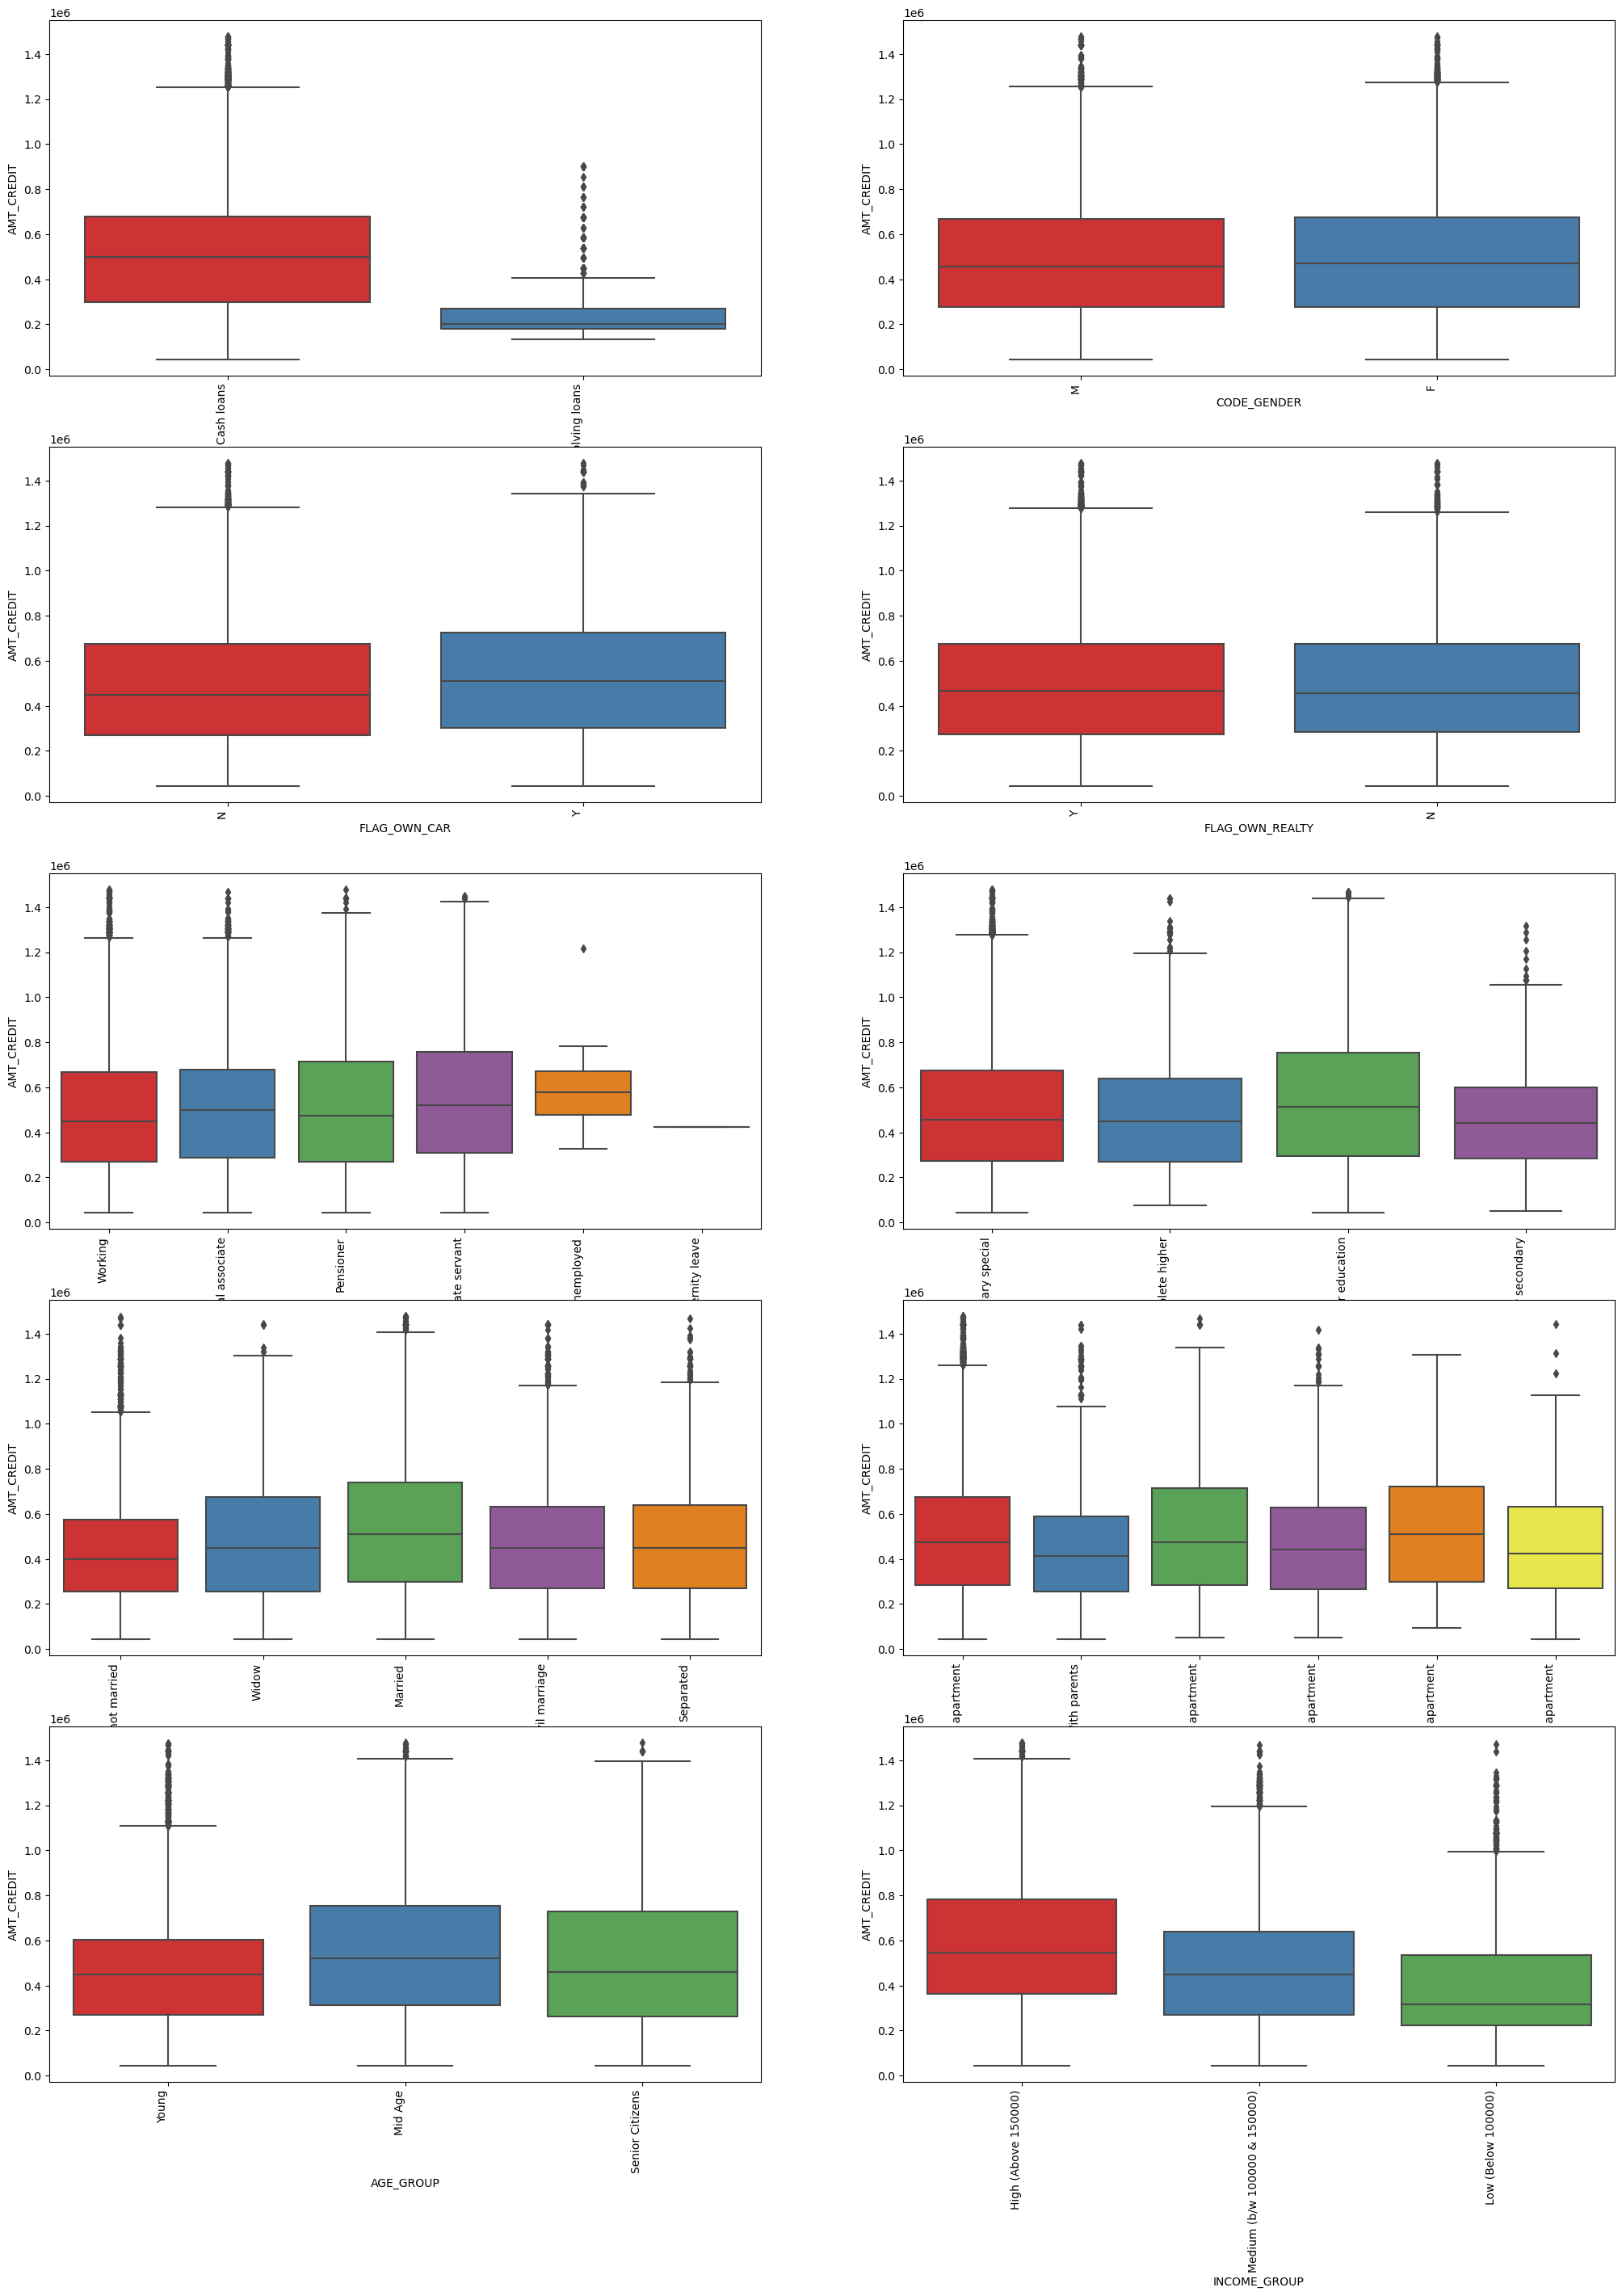

In [64]:
plt.figure(figsize=(25,40))
k=0
for category in categories:
    k = k+1
    df = plt.subplot(6,2,k)
    sns.boxplot(x = category, y = 'AMT_CREDIT', data=df_target_1,palette="Set1")
    temp =df.set_xticklabels(df.get_xticklabels(), rotation = 90, horizontalalignment='right')

<b>Inference</b>
1. The amount of credit is very low for revolving credit.
2. There is no difference in credit amounts for customers of either gender, or for customers who own cars or real estate.
3. Younger customers have lower credit amounts than middle-aged and senior customers.
4. Higher income groups obtain larger amounts of credit.

#### For Repayers

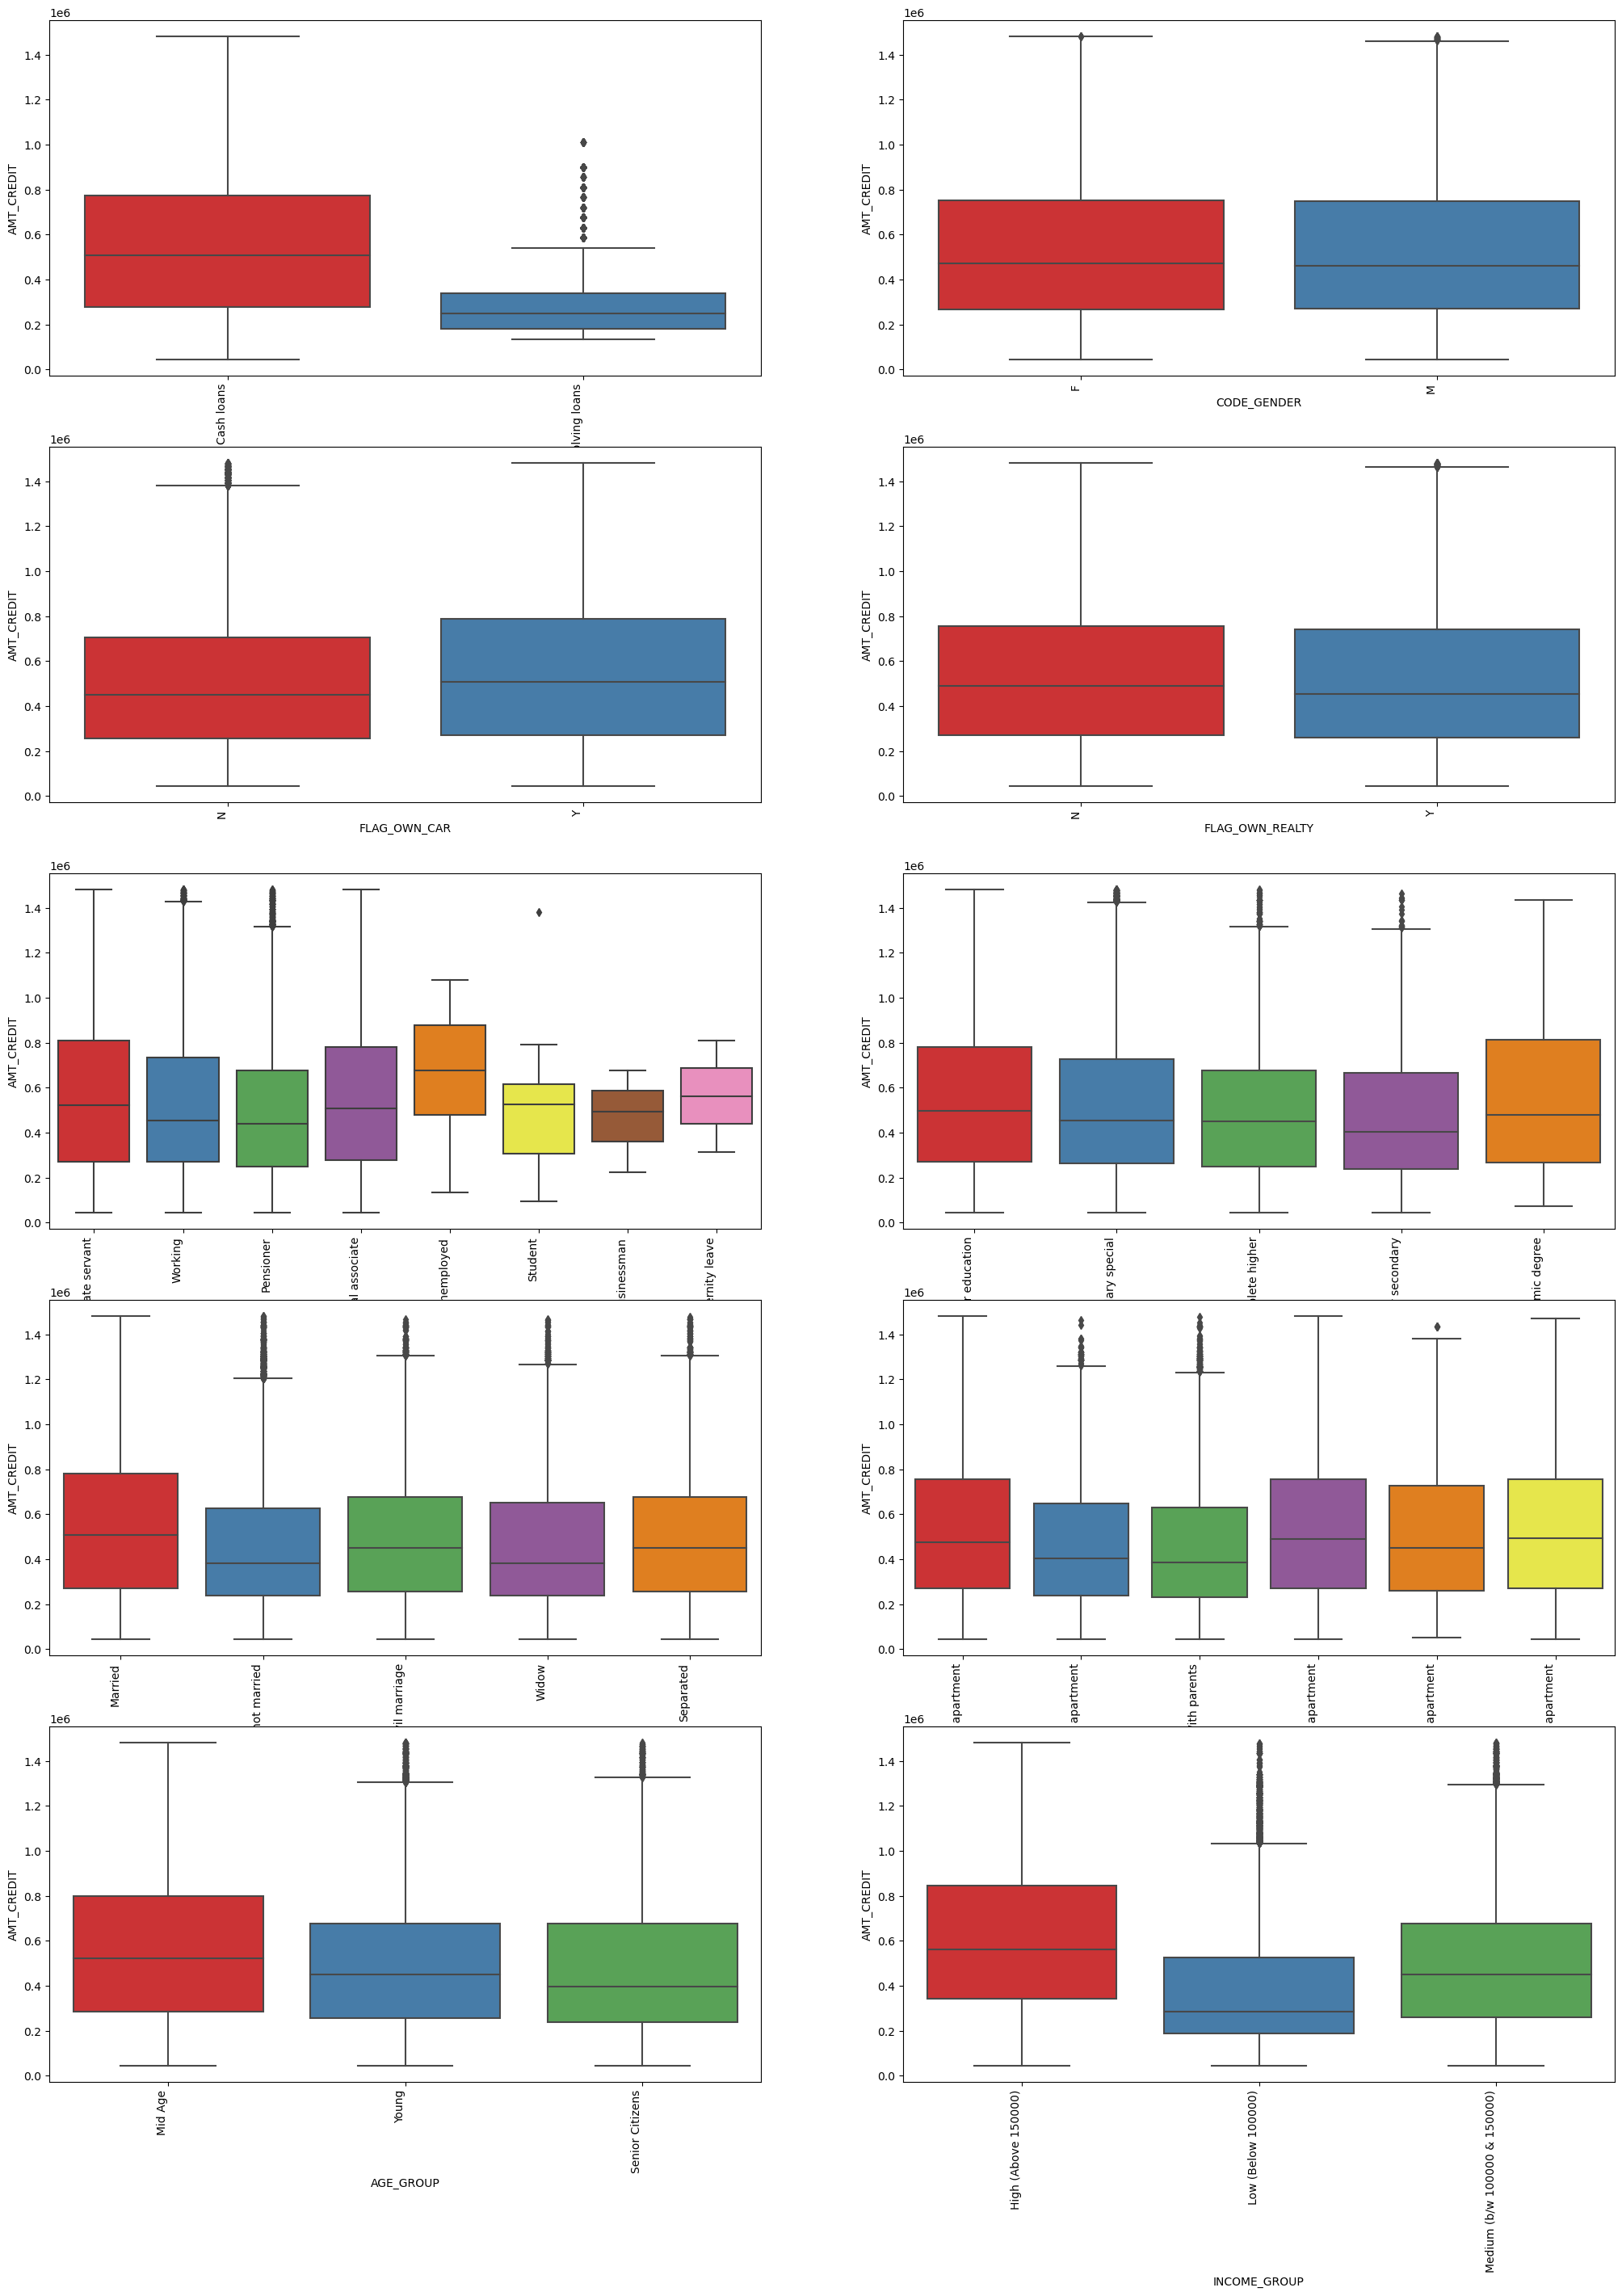

In [65]:
plt.figure(figsize=(25,40))
k=0
for category in categories:
    k = k+1
    df = plt.subplot(6,2,k)
    sns.boxplot(x = category, y = 'AMT_CREDIT', data=df_target_0,palette="Set1")
    temp =df.set_xticklabels(df.get_xticklabels(), rotation = 90, horizontalalignment='right')

<b>Inference</b>
1. The amount of credit is very low for revolving credit.
2. There is no difference in the amount of credit for customers of either gender, or for customers who own cars or real estate.
3. Middle-aged customers have higher credit amounts than younger and senior customers.
4. Higher income groups have higher loan amounts and lower income groups have lower loan amounts.
5. The amount of loans is higher for those who are unemployed.
6. Married individuals have higher loan balances.

## Analysing the Relationship between Columns

 ### Income group and gender

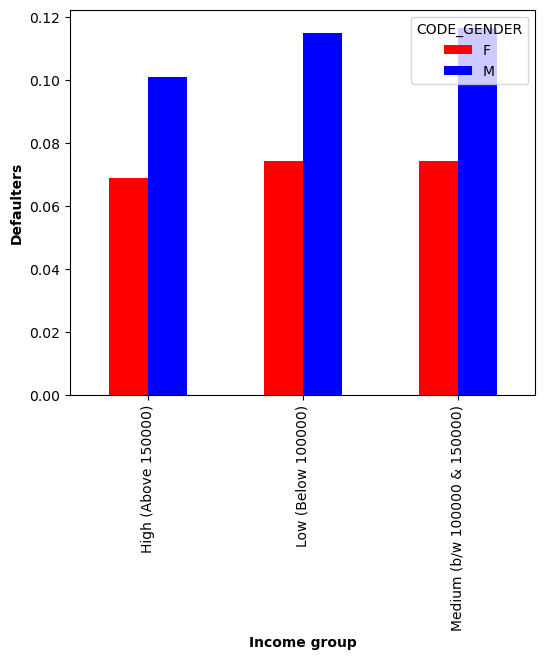

In [66]:
cea_df.pivot_table(values='TARGET',index='INCOME_GROUP',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(6,5),rot=90,color=['red','blue'])
plt.xlabel('Income group',fontweight='bold')
plt.ylabel('Defaulters',fontweight='bold');

##### Inference
Men are more likely to default than women in all income groups.

### Education And Gender

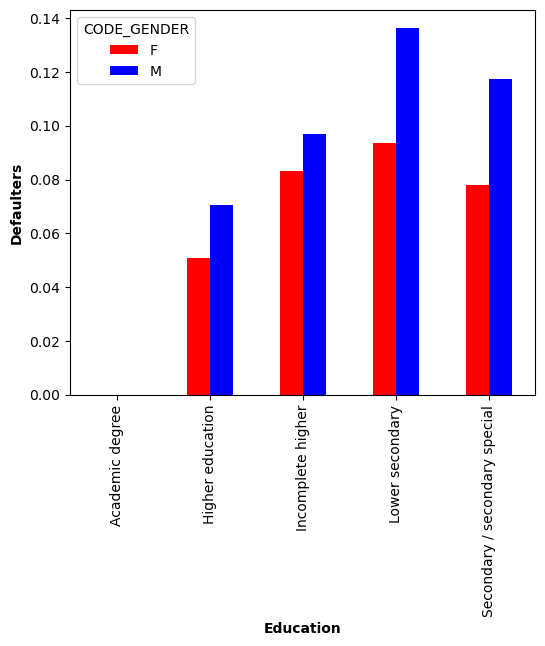

In [67]:
cea_df.pivot_table(values='TARGET',index='NAME_EDUCATION_TYPE',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(6,5),rot=90,color=['red','blue'])
plt.xlabel('Education',fontweight='bold')
plt.ylabel('Defaulters',fontweight='bold');

##### Inference
1. Less-educated clients are more likely to default, followed by more-educated clients with secondary and incomplete education.
2. Higher-educated clients are more likely to repay their debts
3. Women default less than men at all education levels.

### Age group and Income group

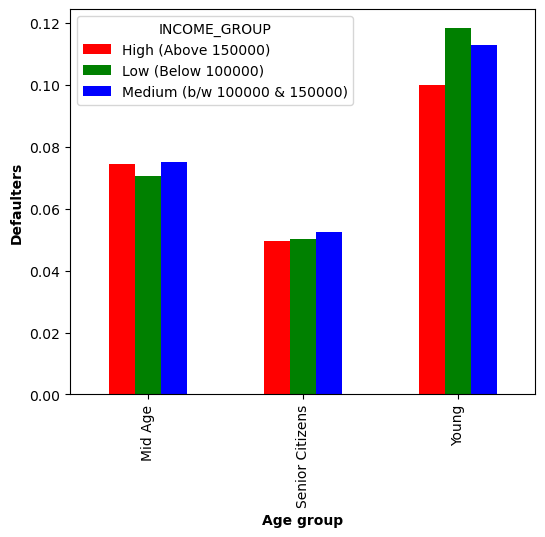

In [68]:
cea_df.pivot_table(values='TARGET',index='AGE_GROUP',columns='INCOME_GROUP',aggfunc='mean').plot.bar(figsize=(6,5),rot=90,color=['red','green','blue'])
plt.xlabel('Age group',fontweight='bold')
plt.ylabel('Defaulters',fontweight='bold');

##### Inference
1. Younger clients default more than middle-aged and older clients
2. Younger clients and lower income clients default more.
3. Middle-aged and older customers have about the same default rate for all income groups

 ### Credit amount group and Income group

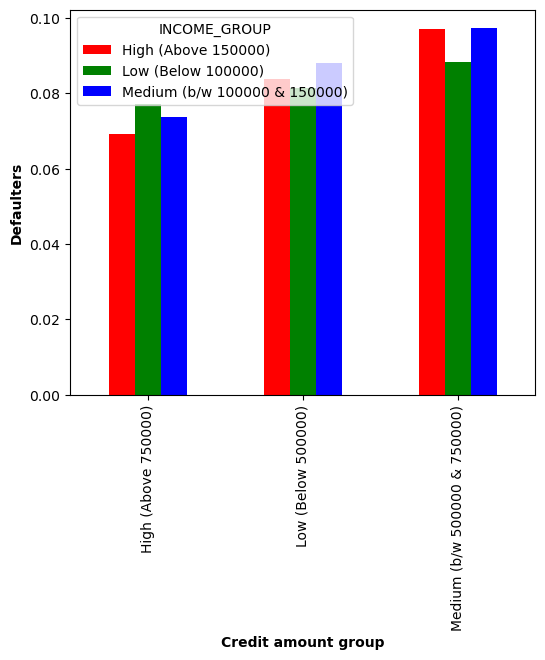

In [69]:
cea_df.pivot_table(values='TARGET',index='CREDIT_GROUP',columns='INCOME_GROUP',aggfunc='mean').plot.bar(figsize=(6,5),rot=90,color=['red','green','blue'])
plt.xlabel('Credit amount group',fontweight='bold')
plt.ylabel('Defaulters',fontweight='bold');

##### Inference
1. All income groups are more likely to default in the medium credit amount group.
2. High credit amount groups are less likely to default in all income groups.

### Credit amount group and Age group

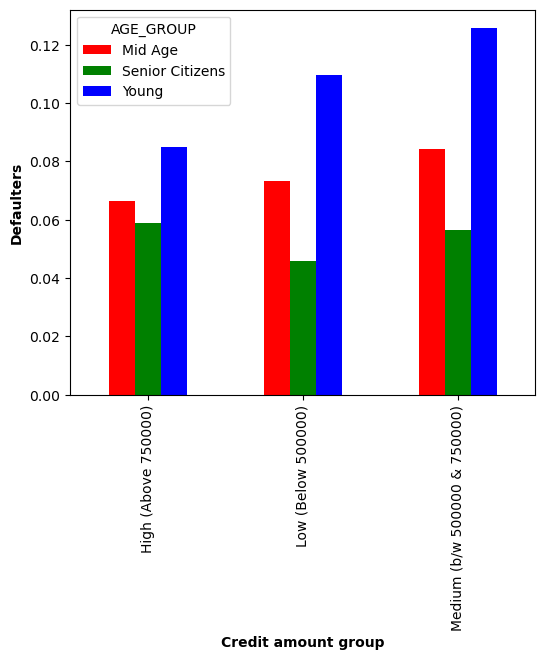

In [70]:
cea_df.pivot_table(values='TARGET',index='CREDIT_GROUP',columns='AGE_GROUP',aggfunc='mean').plot.bar(figsize=(6,5),rot=90,color=['red','green','blue'])
plt.xlabel('Credit amount group',fontweight='bold')
plt.ylabel('Defaulters',fontweight='bold');

##### Inference
1. Younger borrowers with medium and low amounts of credit are more likely to default
2. For all credit amount groups, the elderly are less likely to default.

### Profession and Gender

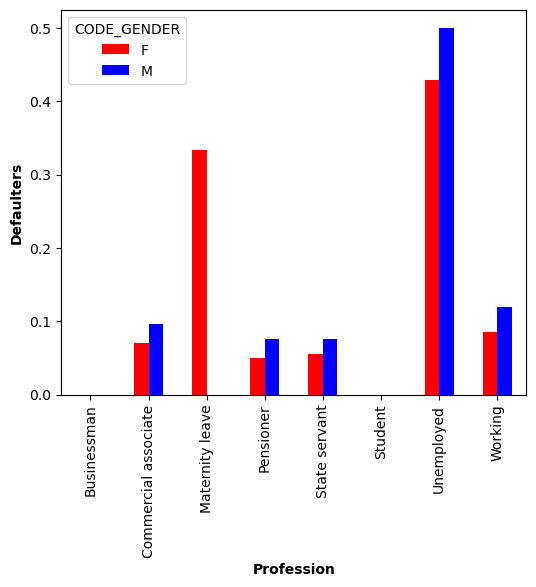

In [71]:
cea_df.pivot_table(values='TARGET',index='NAME_INCOME_TYPE',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(6,5),rot=90,color=['red','blue'])
plt.xlabel('Profession',fontweight='bold')
plt.ylabel('Defaulters',fontweight='bold');

##### Inference
1. Clients who are unemployed are more likely to default.
2. Clients with maternity leave are expected to default more often.
3. Other occupations have lower default rates.
4. Men are more likely to default in each occupation than women.

### Family status and age group

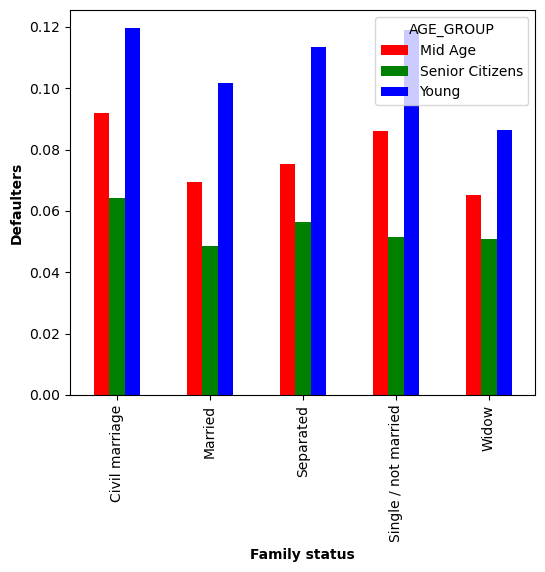

In [72]:
cea_df.pivot_table(values='TARGET',index='NAME_FAMILY_STATUS',columns='AGE_GROUP',aggfunc='mean').plot.bar(figsize=(6,5),rot=90,color=['red','green','blue'])
plt.xlabel('Family status',fontweight='bold')
plt.ylabel('Defaulters',fontweight='bold');

##### Inference
For all family structures, younger customers default more and senior customers less.

### Family status and gender

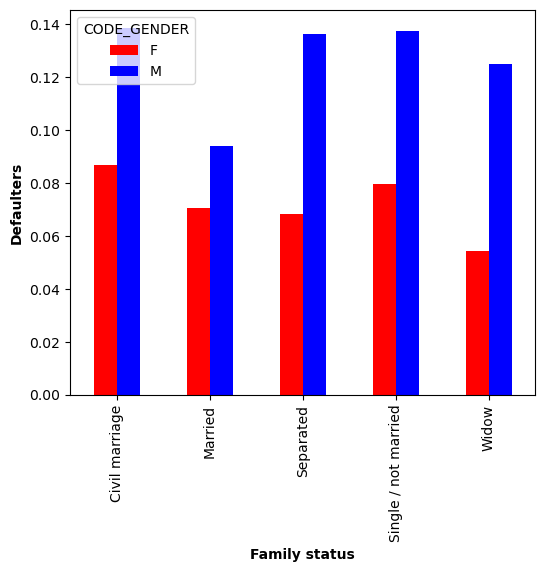

In [73]:
cea_df.pivot_table(values='TARGET',index='NAME_FAMILY_STATUS',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(6,5),rot=90,color=['red','blue'])
plt.xlabel('Family status',fontweight='bold')
plt.ylabel('Defaulters',fontweight='bold');

##### Inference
In all family structures, men default more often than women.

# Previous Data

In [74]:
# Reading the csv file 'previous_application.csv' using 'read_csv'
cea_prev_df=pd.read_csv('previous_application.csv')

cea_prev_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
cea_prev_df.shape

(1670214, 37)

In [76]:
cea_prev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

## Data Cleaning



In [77]:
# Checking columns with % missing values

(round(100*(cea_prev_df.isnull().sum()/len(cea_prev_df.index)),3))

SK_ID_PREV                      0.000
SK_ID_CURR                      0.000
NAME_CONTRACT_TYPE              0.000
AMT_ANNUITY                    22.287
AMT_APPLICATION                 0.000
AMT_CREDIT                      0.000
AMT_DOWN_PAYMENT               53.636
AMT_GOODS_PRICE                23.082
WEEKDAY_APPR_PROCESS_START      0.000
HOUR_APPR_PROCESS_START         0.000
FLAG_LAST_APPL_PER_CONTRACT     0.000
NFLAG_LAST_APPL_IN_DAY          0.000
RATE_DOWN_PAYMENT              53.636
RATE_INTEREST_PRIMARY          99.644
RATE_INTEREST_PRIVILEGED       99.644
NAME_CASH_LOAN_PURPOSE          0.000
NAME_CONTRACT_STATUS            0.000
DAYS_DECISION                   0.000
NAME_PAYMENT_TYPE               0.000
CODE_REJECT_REASON              0.000
NAME_TYPE_SUITE                49.120
NAME_CLIENT_TYPE                0.000
NAME_GOODS_CATEGORY             0.000
NAME_PORTFOLIO                  0.000
NAME_PRODUCT_TYPE               0.000
CHANNEL_TYPE                    0.000
SELLERPLACE_

In [78]:
#Converting into data frame and dropping the null values that are greater than 40%

temp=(100*cea_prev_df.isnull().sum()/cea_prev_df.shape[0]).reset_index().rename(columns={"index":"Column",0:"%missing"})
extract_cols=list(temp[temp["%missing"]>=40]["Column"])
cea_prev_df=cea_prev_df.drop(extract_cols,axis=1)

In [79]:
(round(100*(cea_prev_df.isnull().sum()/len(cea_prev_df.index)),3))

SK_ID_PREV                      0.000
SK_ID_CURR                      0.000
NAME_CONTRACT_TYPE              0.000
AMT_ANNUITY                    22.287
AMT_APPLICATION                 0.000
AMT_CREDIT                      0.000
AMT_GOODS_PRICE                23.082
WEEKDAY_APPR_PROCESS_START      0.000
HOUR_APPR_PROCESS_START         0.000
FLAG_LAST_APPL_PER_CONTRACT     0.000
NFLAG_LAST_APPL_IN_DAY          0.000
NAME_CASH_LOAN_PURPOSE          0.000
NAME_CONTRACT_STATUS            0.000
DAYS_DECISION                   0.000
NAME_PAYMENT_TYPE               0.000
CODE_REJECT_REASON              0.000
NAME_CLIENT_TYPE                0.000
NAME_GOODS_CATEGORY             0.000
NAME_PORTFOLIO                  0.000
NAME_PRODUCT_TYPE               0.000
CHANNEL_TYPE                    0.000
SELLERPLACE_AREA                0.000
NAME_SELLER_INDUSTRY            0.000
CNT_PAYMENT                    22.286
NAME_YIELD_GROUP                0.000
PRODUCT_COMBINATION             0.021
dtype: float

<b>In order to conduct further analysis, it is necessary to remove columns that are not needed.</b>

In [80]:
cols_unwanted= ['HOUR_APPR_PROCESS_START','DAYS_DECISION','NFLAG_LAST_APPL_IN_DAY','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY','WEEKDAY_APPR_PROCESS_START','SELLERPLACE_AREA']
cea_prev_df = cea_prev_df.drop(cols_unwanted,axis=1)

### Handling Missing Values

In [81]:
#Due to the size of the DF, rows with Null values for AMT_ANNUITY should be deleted. 
#According to application data frame, these column ise necessary for analysis, so they should not be deleted
cea_prev_df = cea_prev_df[(~(np.isnan(cea_prev_df['AMT_ANNUITY'])))]

In [82]:
(round(100*(cea_prev_df.isnull().sum()/len(cea_prev_df.index)),3))

SK_ID_PREV                0.00
SK_ID_CURR                0.00
NAME_CONTRACT_TYPE        0.00
AMT_ANNUITY               0.00
AMT_APPLICATION           0.00
AMT_CREDIT                0.00
AMT_GOODS_PRICE           3.98
NAME_CASH_LOAN_PURPOSE    0.00
NAME_CONTRACT_STATUS      0.00
NAME_PAYMENT_TYPE         0.00
CODE_REJECT_REASON        0.00
NAME_CLIENT_TYPE          0.00
NAME_GOODS_CATEGORY       0.00
NAME_PORTFOLIO            0.00
NAME_PRODUCT_TYPE         0.00
CHANNEL_TYPE              0.00
NAME_SELLER_INDUSTRY      0.00
CNT_PAYMENT               0.00
NAME_YIELD_GROUP          0.00
PRODUCT_COMBINATION       0.00
dtype: float64

## Merging both Datasets
### On the basis of SK_ID as primary key

In [83]:
cea_prev_df_merged = cea_prev_df.merge( cea_df, how='left', on="SK_ID_CURR")
cea_prev_df_merged.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE_x,AMT_ANNUITY_x,AMT_APPLICATION,AMT_CREDIT_x,AMT_GOODS_PRICE_x,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,TARGET,NAME_CONTRACT_TYPE_y,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_y,AMT_ANNUITY_y,AMT_GOODS_PRICE_y,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_QRT,AGE,YEARS_EMPLOYED,AGE_GROUP,CREDIT_GROUP,INCOME_GROUP
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,XAP,Approved,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,Connectivity,12.0,middle,POS mobile with interest,0.0,Cash loans,F,N,Y,1.0,225000.0,533668.5,25803.0,477000.0,State servant,Incomplete higher,Married,House / apartment,0.046220,-4120.0,NaN,3.0,1.0,1.0,0.0,1.0,Military,-548.0,0.0,40.0,21.0,Mid Age,Medium (b/w 500000 & 750000),High (Above 150000)
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,XNA,Approved,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,XNA,36.0,low_action,Cash X-Sell: low,0.0,Revolving loans,F,N,N,0.0,90000.0,135000.0,6750.0,135000.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,-4263.0,Private service staff,2.0,2.0,2.0,0.0,0.0,Self-employed,-517.0,0.0,59.0,4.0,Mid Age,Low (Below 500000),Low (Below 100000)
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,XNA,Approved,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,XNA,12.0,high,Cash X-Sell: high,0.0,Cash loans,F,N,Y,3.0,40500.0,284400.0,16456.5,225000.0,Working,Secondary / secondary special,Married,House / apartment,0.025164,-1964.0,Core staff,5.0,2.0,2.0,0.0,0.0,Postal,-301.0,0.0,29.0,4.0,Young,Low (Below 500000),Low (Below 100000)
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,XNA,Approved,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,XNA,12.0,middle,Cash X-Sell: middle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,Repairs,Refused,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,XNA,24.0,high,Cash Street: high,0.0,Cash loans,F,N,N,1.0,180000.0,628069.5,34200.0,499500.0,State servant,Secondary / secondary special,Married,House / apartment,0.028663,-2698.0,NaN,3.0,2.0,2.0,1.0,1.0,Security Ministries,-280.0,2.0,28.0,7.0,Young,Medium (b/w 500000 & 750000),High (Above 150000)


In [84]:
cea_prev_df_merged.shape

(1297979, 50)

In [85]:
cea_prev_df_merged.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE_x,AMT_ANNUITY_x,AMT_APPLICATION,AMT_CREDIT_x,AMT_GOODS_PRICE_x,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,TARGET,NAME_CONTRACT_TYPE_y,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_y,AMT_ANNUITY_y,AMT_GOODS_PRICE_y,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_QRT,AGE,YEARS_EMPLOYED,AGE_GROUP,CREDIT_GROUP,INCOME_GROUP
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,XAP,Approved,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,Connectivity,12.0,middle,POS mobile with interest,0.0,Cash loans,F,N,Y,1.0,225000.0,533668.5,25803.0,477000.0,State servant,Incomplete higher,Married,House / apartment,0.046220,-4120.0,NaN,3.0,1.0,1.0,0.0,1.0,Military,-548.0,0.0,40.0,21.0,Mid Age,Medium (b/w 500000 & 750000),High (Above 150000)
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,XNA,Approved,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,XNA,36.0,low_action,Cash X-Sell: low,0.0,Revolving loans,F,N,N,0.0,90000.0,135000.0,6750.0,135000.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,-4263.0,Private service staff,2.0,2.0,2.0,0.0,0.0,Self-employed,-517.0,0.0,59.0,4.0,Mid Age,Low (Below 500000),Low (Below 100000)
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,XNA,Approved,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,XNA,12.0,high,Cash X-Sell: high,0.0,Cash loans,F,N,Y,3.0,40500.0,284400.0,16456.5,225000.0,Working,Secondary / secondary special,Married,House / apartment,0.025164,-1964.0,Core staff,5.0,2.0,2.0,0.0,0.0,Postal,-301.0,0.0,29.0,4.0,Young,Low (Below 500000),Low (Below 100000)
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,XNA,Approved,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,XNA,12.0,middle,Cash X-Sell: middle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,Repairs,Refused,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,XNA,24.0,high,Cash Street: high,0.0,Cash loans,F,N,N,1.0,180000.0,628069.5,34200.0,499500.0,State servant,Secondary / secondary special,Married,House / apartment,0.028663,-2698.0,NaN,3.0,2.0,2.0,1.0,1.0,Security Ministries,-280.0,2.0,28.0,7.0,Young,Medium (b/w 500000 & 750000),High (Above 150000)


In [86]:
t_0 = cea_df.loc[cea_df['TARGET'] == 0]
t_1 = cea_df.loc[cea_df['TARGET'] == 1]

In [87]:
prev_t_0 = cea_prev_df_merged.loc[cea_prev_df_merged['TARGET'] == 0]
prev_t_1 = cea_prev_df_merged.loc[cea_prev_df_merged['TARGET'] == 1]

## Analysis
### Finding Relations Between Columns

#### Current loan default status relative to past loan applications

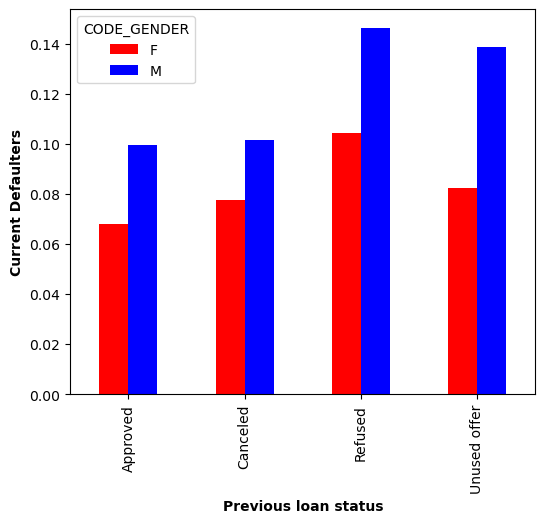

In [88]:
cea_prev_df_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(6,5),color=['red','blue'])
plt.xlabel('Previous loan status',fontweight='bold')
plt.ylabel('Current Defaulters',fontweight='bold');

#### Inference
We see that previously rejected clients default more than previously approved clients. We also see that in all cases, males default more than females.

#### Previous loan applications and current loan defaulters for income groups

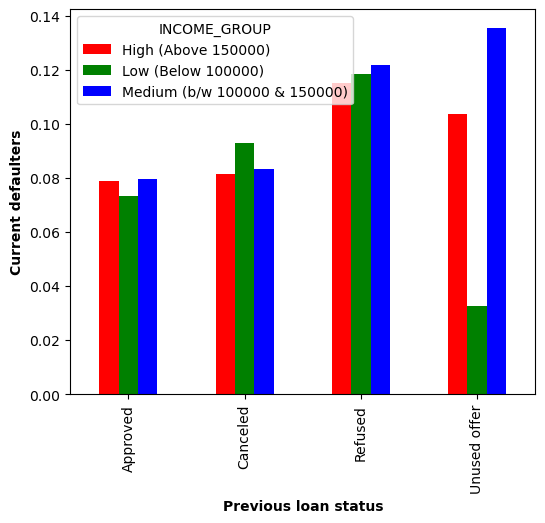

In [89]:
cea_prev_df_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='INCOME_GROUP',aggfunc='mean').plot.bar(figsize=(6,5),color=['red','green','blue'])
plt.xlabel('Previous loan status',fontweight='bold')
plt.ylabel('Current defaulters',fontweight='bold');

#### Inference
1. For previous unused offers, middle-income groups defaulted most often and low-income groups the least.
2. For other application situations, all income groups defaulted more or less equally.

#### Current loan defaulters for previous loan application and age groups

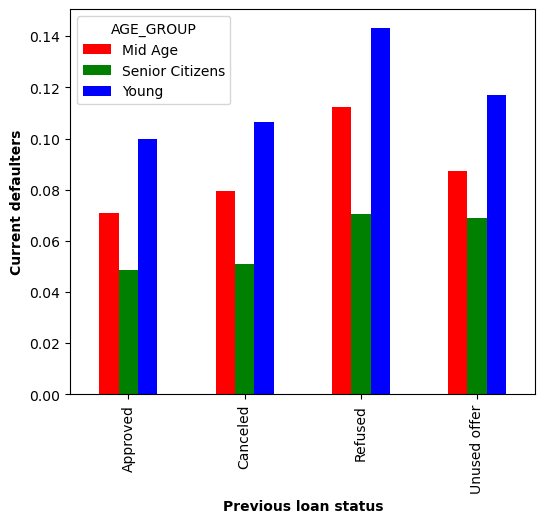

In [90]:
cea_prev_df_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='AGE_GROUP',aggfunc='mean').plot.bar(figsize=(6,5),color=['red','green','blue'])
plt.xlabel('Previous loan status',fontweight='bold')
plt.ylabel('Current defaulters',fontweight='bold');

#### Inference
1. In all previous status, more young applicants were defaulted.
2. In all previous status, senior applicants were defaulted but less than other applicants.

#### Current loan defaulters for previous loan application  and portfolio of the loan

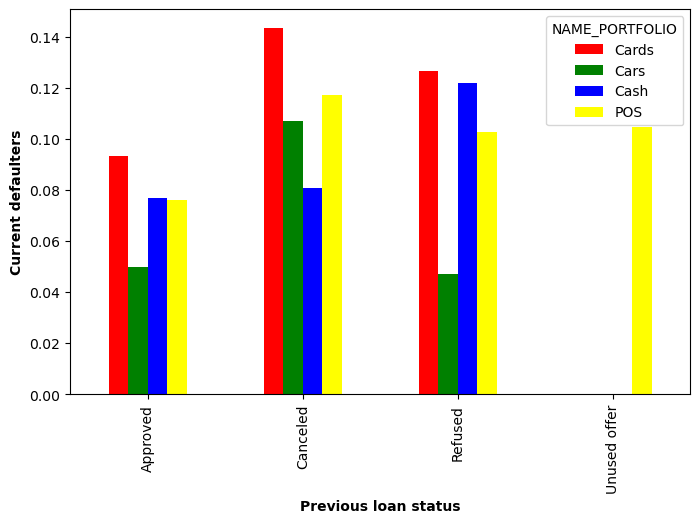

In [91]:
cea_prev_df_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='NAME_PORTFOLIO',aggfunc='mean').plot.bar(figsize=(8,5),color=['red','green','blue','yellow'])
plt.xlabel('Previous loan status',fontweight='bold')
plt.ylabel('Current defaulters',fontweight='bold');

#### Inference
1. Most customers who applied for credit card loans in the past were in default.
2. Customers who applied for a car loan were less likely to default because of their approved loan status.
3. Customers who applied for a POS loan had fewer defaults when the loan status was denied.

#### Current loan defaulters for previous loan application  and client types

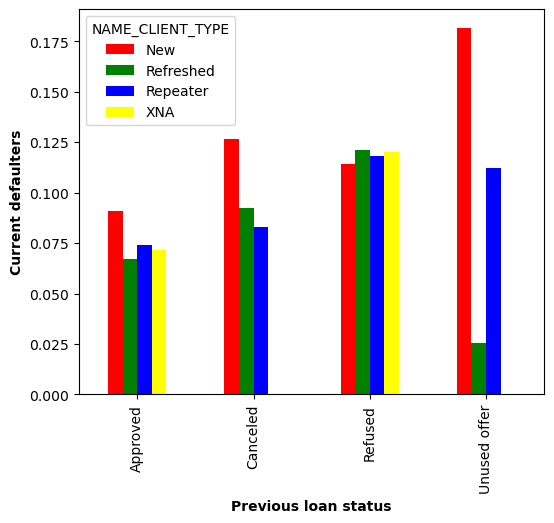

In [92]:
cea_prev_df_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='NAME_CLIENT_TYPE',aggfunc='mean').plot.bar(figsize=(6,5),color=['red','green','blue','yellow'])
plt.xlabel('Previous loan status',fontweight='bold')
plt.ylabel('Current defaulters',fontweight='bold');

#### Inference
1. It can be seen that the defaulters are more likely to be customers with loan statuses that were previously unused offers and who were new.
2. Customers with previously approved status are more likely to default, followed by new customers, followed by repeat customers.
3. Applicants with Rejected status in the past, Refreshed applicants are the ones who defaulted.
4. for applicants who were cancelled in the past, more defaulted clients followed by new clients.

# Case Summary Continued In PPT